### Import libraries





In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from pandas_profiling import ProfileReport
%matplotlib inline



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import dataset 

In [ ]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [ ]:
X_train_transformed = df_train.drop(['RainTomorrow'], axis=1)
y_train = df_train['RainTomorrow']
X_test_transformed = df_test.drop(['RainTomorrow'], axis=1)
y_test = df_test['RainTomorrow']

In [ ]:
X_train_transformed_split, X_val_transformed, y_train_split, y_val = train_test_split(X_train_transformed, y_train, test_size=0.2, random_state = 0)

### Modeling

#### Default Configuration for 3 models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
log_reg = LogisticRegression(max_iter=10000, random_state=1)
linear_svm = LinearSVC(max_iter=10000, random_state=1)
kernel_svm = SVC(random_state=1)
tree_clf = DecisionTreeClassifier(random_state=1)

In [ ]:
_ = log_reg.fit(X_train_transformed, y_train)
_ = linear_svm.fit(X_train_transformed, y_train)
_ = kernel_svm.fit(X_train_transformed, y_train)
_ = tree_clf.fit(X_train_transformed, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred_log = log_reg.predict(X_test_transformed)
y_pred_linear_svm = linear_svm.predict(X_test_transformed)
y_pred_tree = tree_clf.predict(X_test_transformed)

In [ ]:
confusion_matrix(y_pred_log, y_test)

array([[20891,  3085],
       [ 1176,  3287]])

In [ ]:
print(classification_report(y_pred_log, y_test))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     23976
           1       0.52      0.74      0.61      4463

    accuracy                           0.85     28439
   macro avg       0.73      0.80      0.76     28439
weighted avg       0.88      0.85      0.86     28439



In [ ]:
pos_pred_idx = np.where(y_pred_log == 1)[0]
negative_pred_idx = np.where(y_pred_log == 0)[0]

In [ ]:
pos_pred_idx.shape

(4463,)

In [ ]:
negative_pred_idx.shape

(23976,)

In [ ]:
false_pos_pred_idx = np.where(y_test[pos_pred_idx] == 0)[0]
false_neg_pred_idx = np.where(y_test[negative_pred_idx] == 1)[0]

In [ ]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,...,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
88578,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8,0,1,2012,10,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
59016,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7,0,1,2011,5,24,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
127049,10.1,15.4,3.2,4.8,8.5,31.0,13.0,9.0,70.0,61.0,1014.4,1016.1,5.0,5.0,12.3,13.0,1,0,2009,8,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
120886,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3,0,1,2009,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
136649,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7,1,0,2010,7,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
log_feat_importance = permutation_importance(log_reg, X_test_transformed, y_test, n_repeats=30,  random_state=0)

In [ ]:
log_feat_importance

{'importances': array([[-7.03259608e-04,  8.79074510e-04,  9.84563452e-04, ...,
          4.92281726e-04, -7.38422589e-04,  5.27444706e-04],
        [ 8.86107106e-03,  7.59520377e-03,  8.08748550e-03, ...,
          8.12264848e-03,  9.77530856e-03,  7.34906291e-03],
        [ 6.64580330e-03,  7.24357397e-03,  7.17324800e-03, ...,
          6.96227012e-03,  7.77101867e-03,  7.87650761e-03],
        ...,
        [-7.03259608e-05, -1.05488941e-04,  1.05488941e-04, ...,
          7.03259608e-05, -1.40651922e-04,  1.40651922e-04],
        [ 3.51629804e-05,  3.16466824e-04,  1.75814902e-04, ...,
          2.10977882e-04,  4.57118745e-04,  2.46140863e-04],
        [-1.05488941e-04, -3.16466824e-04,  0.00000000e+00, ...,
          3.51629804e-05, -1.05488941e-04,  1.40651922e-04]]),
 'importances_mean': array([ 3.34048314e-04,  7.87064712e-03,  7.66201343e-03, -4.21955765e-05,
         4.40709355e-03,  2.86496243e-02, -1.44168220e-04,  1.86832636e-03,
         5.01658521e-04,  7.46392864e-02, 

In [ ]:
for i in log_feat_importance.importances_mean.argsort()[::-1]:
     if log_feat_importance.importances_mean[i] - 2 * log_feat_importance.importances_std[i] > 0:
         print(f"{X_test.columns[i]:<8} "
               f"{log_feat_importance.importances_mean[i]:.3f}")

Humidity3pm 0.075
Pressure3pm 0.063
WindGustSpeed 0.029
Pressure9am 0.023
MaxTemp  0.008
Rainfall 0.008
Sunshine 0.004
Cloud3pm 0.003
WindSpeed3pm 0.002
Location_Wollongong 0.001
Location_MountGinini 0.001
Location_Adelaide 0.001
Location_Perth 0.001
Location_Townsville 0.001
Location_Darwin 0.000
Location_Hobart 0.000
Location_MelbourneAirport 0.000
Location_Penrith 0.000
Location_Albury 0.000
WindDir9am_S 0.000
WindGustDir_NE 0.000
Location_PerthAirport 0.000
Location_Launceston 0.000


In [ ]:
X_test_false_pos['Humidity3pm']

19556     64.0
135482    47.0
5202      64.0
19157     75.0
130255    38.0
          ... 
126960    34.0
29681     46.0
139002    20.0
33773     37.0
118163    47.0
Name: Humidity3pm, Length: 1176, dtype: float64

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 1440x720 with 0 Axes>

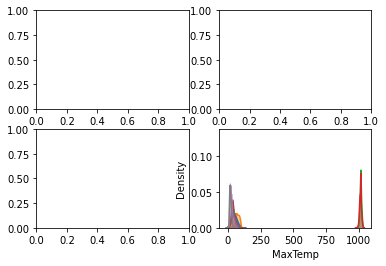

In [ ]:
plt.figure(figsize=(20, 10))
fig, axs = plt.subplots(2, 2)
axs[0][0] = sns.distplot(X_test_false_pos['Humidity3pm'])
axs[0][0] = sns.distplot(X_test_pos['Humidity3pm'])

axs[0][1] = sns.distplot(X_test_false_pos['Pressure3pm'])
axs[0][1] = sns.distplot(X_test_pos['Pressure3pm'])

axs[1][0] = sns.distplot(X_test_false_pos['WindGustSpeed'])
axs[1][0] = sns.distplot(X_test_pos['WindGustSpeed'])

axs[1][1] = sns.distplot(X_test_false_pos['MaxTemp'])
axs[1][1] = sns.distplot(X_test_pos['MaxTemp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


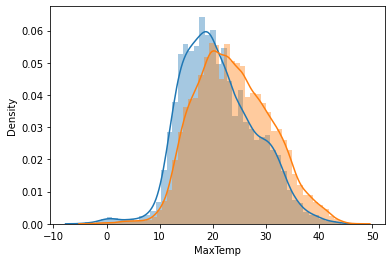

In [ ]:

sns.distplot(X_test_pos['MaxTemp'])
sns.distplot(X_test_neg['MaxTemp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


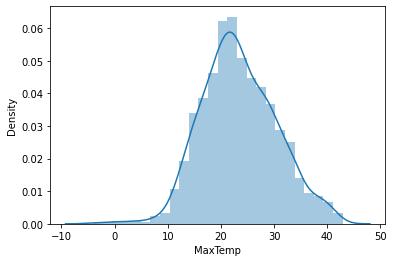

In [ ]:
sns.distplot(X_test_false_pos['MaxTemp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


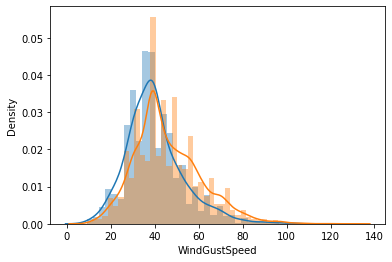

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


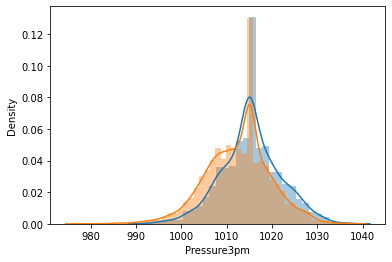

In [ ]:
sns.distplot(X_test_false_pos['Pressure3pm'])
sns.distplot(X_test_pos['Pressure3pm'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


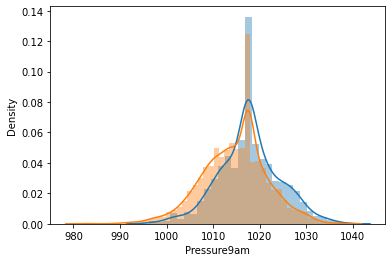

In [ ]:
sns.distplot(X_test_false_pos['Pressure9am'])
sns.distplot(X_test_pos['Pressure9am'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


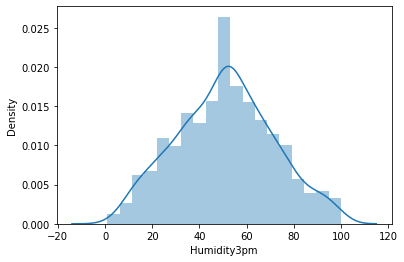

In [ ]:
sns.distplot(X_test_false_pos['Humidity3pm'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


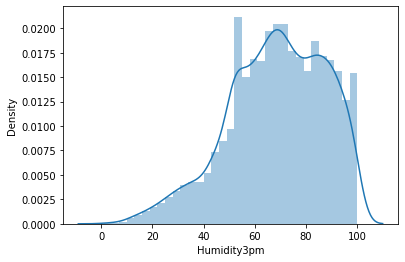

In [ ]:
sns.distplot(X_test_pos['Humidity3pm'])

In [ ]:
false_pos_pred_idx

array([   8,    9,   10, ..., 4454, 4460, 4461])

In [ ]:
X_test_false_neg = X_test.iloc[false_neg_pred_idx]

In [ ]:
X_test_false_pos = X_test.iloc[false_pos_pred_idx]

In [ ]:
X_test_pos = X_test.iloc[np.where(y_test == 1)[0]]
X_test_neg = X_test.iloc[np.where(y_test == 0)[0]]

In [ ]:
X_test_false_neg

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,...,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
10332,5.6,18.8,0.2,2.2,8.5,41.0,24.0,20.0,44.0,31.0,1015.4,1014.5,0.0,1.0,14.3,18.3,0,1,2012,7,28,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
131105,11.8,22.3,0.2,6.0,12.7,41.0,7.0,26.0,50.0,57.0,1018.2,1017.9,5.0,5.0,18.4,19.0,0,1,2012,1,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
72778,15.0,31.2,0.0,5.6,10.5,46.0,15.0,24.0,62.0,21.0,1019.6,1016.0,3.0,1.0,20.4,30.5,0,1,2015,10,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
124059,5.2,20.4,0.0,4.8,8.5,39.0,17.0,20.0,74.0,32.0,1017.6,1015.2,5.0,5.0,13.1,20.0,0,1,2009,8,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
50180,12.9,16.5,0.8,4.8,8.5,30.0,9.0,7.0,78.0,98.0,1019.4,1016.9,5.0,5.0,14.3,14.5,0,1,2012,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10582,16.4,20.5,0.0,1.4,8.5,59.0,20.0,15.0,74.0,57.0,1009.1,1005.3,8.0,3.0,17.5,20.2,0,1,2013,6,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
121068,3.1,21.3,0.0,2.4,10.2,44.0,11.0,11.0,55.0,38.0,1016.8,1010.6,1.0,1.0,12.9,20.4,0,1,2009,9,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
110854,6.0,19.5,0.0,1.4,9.0,39.0,11.0,7.0,67.0,56.0,1023.8,1020.8,1.0,3.0,12.0,18.8,0,1,2015,5,31,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
105297,7.6,14.0,3.2,4.9,3.2,72.0,35.0,31.0,96.0,64.0,1007.6,1012.7,8.0,5.0,10.4,13.0,1,0,2016,10,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_test_false_pos

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,...,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
19556,20.2,26.7,0.4,4.8,8.5,31.0,2.0,11.0,86.0,64.0,1020.4,1019.6,5.0,5.0,22.7,25.8,0,1,2013,3,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
135482,8.5,20.2,0.0,4.8,8.5,33.0,6.0,20.0,70.0,47.0,1017.6,1015.2,1.0,8.0,12.7,19.2,0,1,2015,11,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5202,16.3,22.9,3.2,4.8,8.5,26.0,13.0,9.0,68.0,64.0,1018.9,1017.2,5.0,5.0,18.9,22.2,1,0,2015,3,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19157,17.0,23.7,0.4,4.8,8.5,22.0,13.0,17.0,86.0,75.0,1015.1,1013.5,5.0,5.0,19.4,21.8,0,1,2011,12,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
130255,5.9,14.1,3.2,1.0,3.0,54.0,20.0,30.0,66.0,38.0,998.7,997.9,5.0,7.0,9.7,14.0,1,0,2009,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126960,13.1,24.3,0.0,4.8,8.5,37.0,15.0,11.0,50.0,34.0,1025.1,1021.1,5.0,5.0,17.7,22.9,0,1,2009,5,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29681,18.2,26.9,0.0,7.0,8.5,37.0,11.0,13.0,66.0,46.0,1011.6,1007.5,7.0,5.0,20.0,24.8,0,1,2016,2,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139002,21.3,36.3,0.0,6.8,8.5,31.0,9.0,11.0,48.0,20.0,1012.9,1008.4,7.0,7.0,25.9,34.2,0,1,2017,3,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
33773,8.7,22.3,0.0,5.0,10.7,33.0,17.0,22.0,41.0,37.0,1022.7,1018.9,0.0,1.0,16.1,20.3,0,1,2009,9,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Hyperparameter tuning

#### Script for hyperparameter tuning

In [ ]:
import time 
from tqdm import tqdm
import os 
import pickle 
import itertools

In [ ]:

def save_checkpoint(model, output_dir, filename):
    if not os.path.isfile(os.path.join(output_dir, filename)):
        with open(os.path.join(output_dir, filename), 'wb') as f:
            print('Saving model information to {}'.format(os.path.join(output_dir, filename)))
            pickle.dump(model, f)
def load_checkpoint(output_dir, filename):
    if os.path.isfile(os.path.join(output_dir, filename)):
        print('Loading model information from {}'.format(os.path.join(output_dir, filename)))
        with open(os.path.join(output_dir, filename), 'rb') as f:
            return pickle.load(f)  
    return None  

def train(model_name, params, X_train, X_val, y_train, y_val, output_dir, prefix):
    train_scores = []
    val_scores = []
    fit_time = []
    models = []
    best_train_score = 0
    best_val_score = 0
    best_fit_time = None
    best_model = None 
    keys, values = zip(*params.items())
    params_combination = [dict(zip(keys, v)) for v in itertools.product(*values)]
    print(params_combination)
    for params_comb in tqdm(params_combination):
        print()
        filename = prefix
        for key, value in params_comb.items():
            filename += key + '_' + str(value) + '_'
            print('{}: {}'.format(key, value)) 
        filename = filename[:-1] + '.pkl' 
        checkpoint_model = load_checkpoint(output_dir, filename)
        if checkpoint_model is not None: 
            continue
        if model_name == 'logistic_regression':
            model = LogisticRegression(max_iter=10000)
        elif model_name == 'linear_svm':
            model = LinearSVC(max_iter=10000)
        elif model_name == 'rbf_svm':
            model = SVC()
        elif model_name == 'sigmoid_svm':
            model = SVC(kernel='sigmoid')
        elif model_name == 'poly_svm':
            model = SVC(kernel='poly')
        else:
            model = DecisionTreeClassifier()
        model.set_params(**params_comb)
        start = time.time()
        _ = model.fit(X_train, y_train)
        models.append(model)
        ft = time.time() - start
        fit_time.append(ft)
        train_score = model.score(X_train, y_train)
        val_score = model.score(X_val, y_val)
        train_scores.append(train_score)
        model_info = {"model": model, "train_score": train_score, "validation_score": val_score, "fit_time": ft}
        save_checkpoint(model_info, output_dir, filename)
        val_scores.append(val_score)
        if (val_score > best_val_score):
            best_train_score = train_score
            best_val_score = val_score 
            best_fit_time = ft
            best_model = model 
        print('Train score: {}'.format(train_score))
        print('Validation score: {}'.format(val_score))
        print('-'*100)
    best_model_info = {"model": best_model, "train_score": best_train_score, "validation_score": best_val_score, "fit_time": best_fit_time}
    save_checkpoint(best_model_info, output_dir, "best_model.pkl")
    return {"best_model": best_model, "best_score": best_val_score,"models": models, "train_scores": train_scores, "validation_scores": val_scores, "fit_time": fit_time}



#### Logistic Regression

In [ ]:
params = {'C':[1e-4, 5e-4, 1e-3, 5e-3, 0.01, 0.05, 0.1, 0.5, 1, 10, 100, 1000, 10000]}
output_dir = 'grid_search_logistic'

In [ ]:
result = train('logistic_regression',params, X_train_split, X_val, y_train_split, y_val, output_dir, 'logistic_')

  0%|          | 0/13 [00:00<?, ?it/s]

[{'C': 0.0001}, {'C': 0.0005}, {'C': 0.001}, {'C': 0.005}, {'C': 0.01}, {'C': 0.05}, {'C': 0.1}, {'C': 0.5}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}, {'C': 10000}]

C: 0.0001


  8%|▊         | 1/13 [00:01<00:13,  1.13s/it]

Saving model information to grid_search_logistic/logistic_C_0.0001.pkl
Train score: 0.7753700427458435
Validation score: 0.7774603314140037
----------------------------------------------------------------------------------------------------

C: 0.0005


 15%|█▌        | 2/13 [00:02<00:13,  1.19s/it]

Saving model information to grid_search_logistic/logistic_C_0.0005.pkl
Train score: 0.8088085008186543
Validation score: 0.8103380071205661
----------------------------------------------------------------------------------------------------

C: 0.001


 23%|██▎       | 3/13 [00:03<00:12,  1.28s/it]

Saving model information to grid_search_logistic/logistic_C_0.001.pkl
Train score: 0.8178631473687681
Validation score: 0.8165794910113842
----------------------------------------------------------------------------------------------------

C: 0.005


 31%|███       | 4/13 [00:06<00:14,  1.63s/it]

Saving model information to grid_search_logistic/logistic_C_0.005.pkl
Train score: 0.8368185664208873
Validation score: 0.8365346578172388
----------------------------------------------------------------------------------------------------

C: 0.01


 38%|███▊      | 5/13 [00:09<00:16,  2.06s/it]

Saving model information to grid_search_logistic/logistic_C_0.01.pkl
Train score: 0.8406865707723922
Validation score: 0.8407102984484198
----------------------------------------------------------------------------------------------------

C: 0.05


 46%|████▌     | 6/13 [00:14<00:21,  3.00s/it]

Saving model information to grid_search_logistic/logistic_C_0.05.pkl
Train score: 0.8455984967528543
Validation score: 0.8462924706606303
----------------------------------------------------------------------------------------------------

C: 0.1


 54%|█████▍    | 7/13 [00:19<00:21,  3.63s/it]

Saving model information to grid_search_logistic/logistic_C_0.1.pkl
Train score: 0.8459940881069855
Validation score: 0.8473913234583095
----------------------------------------------------------------------------------------------------

C: 0.5


 62%|██████▏   | 8/13 [00:27<00:23,  4.77s/it]

Saving model information to grid_search_logistic/logistic_C_0.5.pkl
Train score: 0.8475654648747843
Validation score: 0.8474352775702166
----------------------------------------------------------------------------------------------------

C: 1


 69%|██████▉   | 9/13 [00:37<00:25,  6.35s/it]

Saving model information to grid_search_logistic/logistic_C_1.pkl
Train score: 0.8476863400107689
Validation score: 0.8474352775702166
----------------------------------------------------------------------------------------------------

C: 10


 77%|███████▋  | 10/13 [00:44<00:19,  6.55s/it]

Saving model information to grid_search_logistic/logistic_C_10.pkl
Train score: 0.8480709427161742
Validation score: 0.8473034152344951
----------------------------------------------------------------------------------------------------

C: 100


 85%|████████▍ | 11/13 [00:51<00:13,  6.83s/it]

Saving model information to grid_search_logistic/logistic_C_100.pkl
Train score: 0.8479940221750931
Validation score: 0.8474352775702166
----------------------------------------------------------------------------------------------------

C: 1000


 92%|█████████▏| 12/13 [01:00<00:07,  7.29s/it]

Saving model information to grid_search_logistic/logistic_C_1000.pkl
Train score: 0.8480269881212708
Validation score: 0.8474352775702166
----------------------------------------------------------------------------------------------------

C: 10000


100%|██████████| 13/13 [01:07<00:00,  5.22s/it]

Saving model information to grid_search_logistic/logistic_C_10000.pkl
Train score: 0.8480269881212708
Validation score: 0.8474352775702166
----------------------------------------------------------------------------------------------------
Saving model information to grid_search_logistic/best_model.pkl


In [ ]:
C = params['C']
train_scores = result['train_scores']
val_scores = result['validation_scores']

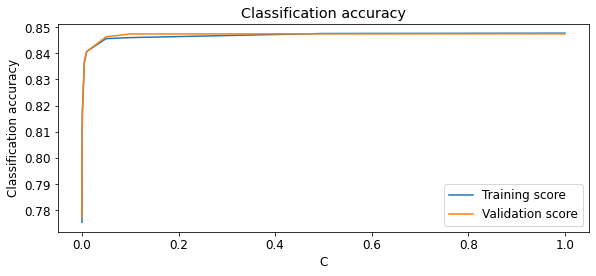

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(16, 4))
accuracy = plt.subplot(121)

accuracy.plot(C[:9], train_scores[:9], label="Training score")
accuracy.plot(C[:9], val_scores[:9], label="Validation score")


# legends and labels
accuracy.set_title("Classification accuracy")

# accuracy.set_xlim(sample_sizes[0], sample_sizes[-1])
# accuracy.set_xticks(())
# accuracy.set_ylim(0.84, 0.95)
# accuracy.set_yticks(())

accuracy.set_xlabel("C")
accuracy.set_ylabel("Classification accuracy")

accuracy.legend(loc='best')

plt.tight_layout()
plt.legend()
plt.show()

#### SVM

##### Linear SVM

In [ ]:
params = {"C": [1e-4, 5e-4, 1e-3, 5e-3, .01, .05, .1, .5, 1, 10, 100, 1000, 1e4]}
OUTPUT_DIR = 'linear_svm_C'

In [ ]:
linear_c_result = train('linear_svm', params, X_train_transformed_split, X_val_transformed, y_train_split, y_val, OUTPUT_DIR, 'linear_svm_')

  0%|          | 0/13 [00:00<?, ?it/s]

[{'C': 0.0001}, {'C': 0.0005}, {'C': 0.001}, {'C': 0.005}, {'C': 0.01}, {'C': 0.05}, {'C': 0.1}, {'C': 0.5}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}, {'C': 10000.0}]

C: 0.0001
Loading model information from linear_svm_C/linear_svm_C_0.0001.pkl

C: 0.0005


 15%|█▌        | 2/13 [00:00<00:02,  4.23it/s]

Saving model information to linear_svm_C/linear_svm_C_0.0005.pkl
Train score: 0.834862586947683
Validation score: 0.8335457782075513
----------------------------------------------------------------------------------------------------

C: 0.001


 23%|██▎       | 3/13 [00:00<00:03,  3.18it/s]

Saving model information to linear_svm_C/linear_svm_C_0.001.pkl
Train score: 0.839873410766678
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

C: 0.005


 31%|███       | 4/13 [00:01<00:03,  2.69it/s]

Saving model information to linear_svm_C/linear_svm_C_0.005.pkl
Train score: 0.8452029053987231
Validation score: 0.8451057096391368
----------------------------------------------------------------------------------------------------

C: 0.01


 38%|███▊      | 5/13 [00:01<00:03,  2.41it/s]

Saving model information to linear_svm_C/linear_svm_C_0.01.pkl
Train score: 0.8462578156764062
Validation score: 0.8461606083249088
----------------------------------------------------------------------------------------------------

C: 0.05


 46%|████▌     | 6/13 [00:02<00:03,  1.84it/s]

Saving model information to linear_svm_C/linear_svm_C_0.05.pkl
Train score: 0.8474226124413481
Validation score: 0.8468199200035164
----------------------------------------------------------------------------------------------------

C: 0.1


 54%|█████▍    | 7/13 [00:04<00:04,  1.32it/s]

Saving model information to linear_svm_C/linear_svm_C_0.1.pkl
Train score: 0.8478841356878345
Validation score: 0.846732011779702
----------------------------------------------------------------------------------------------------

C: 0.5


 62%|██████▏   | 8/13 [00:08<00:09,  1.84s/it]

Saving model information to linear_svm_C/linear_svm_C_0.5.pkl
Train score: 0.8477962264980275
Validation score: 0.8462485165487231
----------------------------------------------------------------------------------------------------

C: 1


 69%|██████▉   | 9/13 [00:16<00:14,  3.72s/it]

Saving model information to linear_svm_C/linear_svm_C_1.pkl
Train score: 0.8477632605518499
Validation score: 0.8462485165487231
----------------------------------------------------------------------------------------------------

C: 10


 77%|███████▋  | 10/13 [02:22<02:01, 40.43s/it]

Saving model information to linear_svm_C/linear_svm_C_10.pkl
Train score: 0.8478511697416569
Validation score: 0.8458968836534658
----------------------------------------------------------------------------------------------------

C: 100


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
 85%|████████▍ | 11/13 [06:46<03:34, 107.48s/it]

Saving model information to linear_svm_C/linear_svm_C_100.pkl
Train score: 0.8479061129852862
Validation score: 0.8463803788844446
----------------------------------------------------------------------------------------------------

C: 1000


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
 92%|█████████▏| 12/13 [12:06<02:51, 171.16s/it]

Saving model information to linear_svm_C/linear_svm_C_1000.pkl
Train score: 0.7846774282166522
Validation score: 0.7831743659619358
----------------------------------------------------------------------------------------------------

C: 10000.0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
100%|██████████| 13/13 [19:17<00:00, 89.04s/it] 

Saving model information to linear_svm_C/linear_svm_C_10000.0.pkl
Train score: 0.8123578343571091
Validation score: 0.8124917586040175
----------------------------------------------------------------------------------------------------
Saving model information to linear_svm_C/best_model.pkl


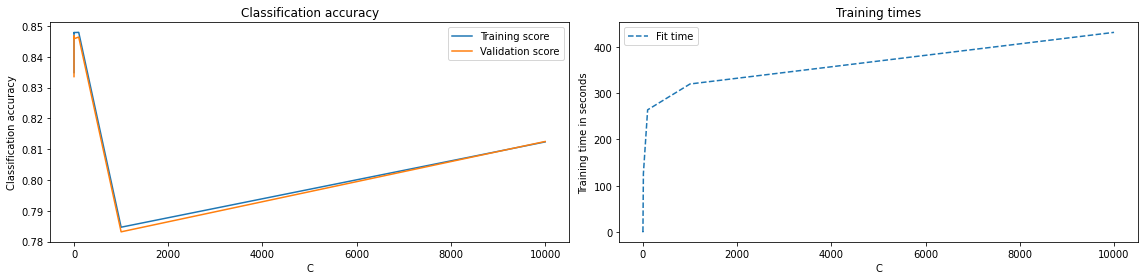

In [ ]:
plt.figure(figsize=(16, 4))
accuracy = plt.subplot(121)
# second y axis for timings
timescale = plt.subplot(122)

accuracy.plot(params["C"][1:], linear_c_result["train_scores"], label="Training score")
accuracy.plot(params["C"][1:], linear_c_result["validation_scores"], label="Validation score")

timescale.plot(params["C"][1:], linear_c_result["fit_time"], '--',
               label='Fit time')


# legends and labels
accuracy.set_title("Classification accuracy")
timescale.set_title("Training times")
# accuracy.set_xlim(sample_sizes[0], sample_sizes[-1])
# accuracy.set_xticks(())
# accuracy.set_ylim(0.84, 0.95)
# accuracy.set_yticks(())
timescale.set_xlabel("C")
accuracy.set_xlabel("C")
accuracy.set_ylabel("Classification accuracy")
timescale.set_ylabel("Training time in seconds")
accuracy.legend(loc='best')
timescale.legend(loc='best')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
linear_svm_models = []
for file in os.listdir(OUTPUT_DIR):
    with open(os.path.join(OUTPUT_DIR, file), 'rb') as f:
        linear_svm_models.append(pickle.load(f))

In [ ]:
os.listdir(OUTPUT_DIR)

['linear_svm_C_0.0001.pkl',
 'linear_svm_C_0.0005.pkl',
 'linear_svm_C_0.001.pkl',
 'linear_svm_C_0.005.pkl',
 'linear_svm_C_0.01.pkl',
 'linear_svm_C_0.05.pkl',
 'linear_svm_C_0.1.pkl',
 'linear_svm_C_0.5.pkl',
 'linear_svm_C_1.pkl',
 'linear_svm_C_10.pkl',
 'linear_svm_C_100.pkl',
 'linear_svm_C_1000.pkl',
 'linear_svm_C_10000.0.pkl',
 'best_model.pkl']

In [ ]:
linear_svm_models

[{'fit_time': 0.45816993713378906,
  'model': LinearSVC(C=0.0001, class_weight=None, dual=True, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=10000,
            multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
            verbose=0),
  'train_score': 0.8148742349153325,
  'validation_score': 0.8139861984088611},
 {'fit_time': 0.4289681911468506,
  'model': LinearSVC(C=0.0005, class_weight=None, dual=True, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=10000,
            multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
            verbose=0),
  'train_score': 0.834862586947683,
  'validation_score': 0.8335457782075513},
 {'fit_time': 0.44905614852905273,
  'model': LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=10000,
            multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      

##### Sigmoid kernel 

In [ ]:
params = {"C": [0.01, 0.1, 1, 100], "gamma": ["scale", 0.1, 1, 10]}
OUTPUT_DIR = 'sigmoid_C_gamma'

In [ ]:
sigmoid_c_gamma_result = train('sigmoid_svm', params, X_train_transformed_split, X_val_transformed, y_train_split, y_val, OUTPUT_DIR, prefix='sigmoid_')

  0%|          | 0/16 [00:00<?, ?it/s]

[{'C': 0.01, 'gamma': 'scale'}, {'C': 0.01, 'gamma': 0.1}, {'C': 0.01, 'gamma': 1}, {'C': 0.01, 'gamma': 10}, {'C': 0.1, 'gamma': 'scale'}, {'C': 0.1, 'gamma': 0.1}, {'C': 0.1, 'gamma': 1}, {'C': 0.1, 'gamma': 10}, {'C': 1, 'gamma': 'scale'}, {'C': 1, 'gamma': 0.1}, {'C': 1, 'gamma': 1}, {'C': 1, 'gamma': 10}, {'C': 100, 'gamma': 'scale'}, {'C': 100, 'gamma': 0.1}, {'C': 100, 'gamma': 1}, {'C': 100, 'gamma': 10}]

C: 0.01
gamma: scale
Loading model information from sigmoid_C_gamma/sigmoid_C_0.01_gamma_scale.pkl


  6%|▋         | 1/16 [00:01<00:19,  1.28s/it]


C: 0.01
gamma: 0.1
Loading model information from sigmoid_C_gamma/sigmoid_C_0.01_gamma_0.1.pkl


 12%|█▎        | 2/16 [00:02<00:18,  1.33s/it]


C: 0.01
gamma: 1
Loading model information from sigmoid_C_gamma/sigmoid_C_0.01_gamma_1.pkl


 19%|█▉        | 3/16 [00:04<00:19,  1.47s/it]


C: 0.01
gamma: 10
Loading model information from sigmoid_C_gamma/sigmoid_C_0.01_gamma_10.pkl


 25%|██▌       | 4/16 [00:05<00:17,  1.44s/it]


C: 0.1
gamma: scale
Loading model information from sigmoid_C_gamma/sigmoid_C_0.1_gamma_scale.pkl


 31%|███▏      | 5/16 [00:06<00:14,  1.33s/it]


C: 0.1
gamma: 0.1


 38%|███▊      | 6/16 [37:59<1:53:48, 682.83s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_0.1_gamma_0.1.pkl
Train score: 0.7876004087777326
Validation score: 0.7904707485385257
----------------------------------------------------------------------------------------------------

C: 0.1
gamma: 1


 44%|████▍     | 7/16 [1:53:56<4:36:45, 1845.00s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_0.1_gamma_1.pkl
Train score: 0.7748865422019054
Validation score: 0.776713111511582
----------------------------------------------------------------------------------------------------

C: 0.1
gamma: 10


 50%|█████     | 8/16 [2:18:52<3:52:01, 1740.22s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_0.1_gamma_10.pkl
Train score: 0.7753700427458435
Validation score: 0.7774603314140037
----------------------------------------------------------------------------------------------------

C: 1
gamma: scale


 56%|█████▋    | 9/16 [2:42:50<3:12:26, 1649.56s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_1_gamma_scale.pkl
Train score: 0.7498324231069305
Validation score: 0.7517911300602171
----------------------------------------------------------------------------------------------------

C: 1
gamma: 0.1


 62%|██████▎   | 10/16 [3:12:04<2:48:06, 1681.00s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_1_gamma_0.1.pkl
Train score: 0.7538432798918717
Validation score: 0.7551755966770691
----------------------------------------------------------------------------------------------------

C: 1
gamma: 1


 69%|██████▉   | 11/16 [3:47:23<2:31:01, 1812.30s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_1_gamma_1.pkl
Train score: 0.7136907574475567
Validation score: 0.7108698518746429
----------------------------------------------------------------------------------------------------

C: 1
gamma: 10


 75%|███████▌  | 12/16 [4:12:21<1:54:32, 1718.00s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_1_gamma_10.pkl
Train score: 0.7753700427458435
Validation score: 0.7774603314140037
----------------------------------------------------------------------------------------------------

C: 100
gamma: scale


 81%|████████▏ | 13/16 [4:42:13<1:27:00, 1740.19s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_100_gamma_scale.pkl
Train score: 0.7453930090216806
Validation score: 0.7462089578480067
----------------------------------------------------------------------------------------------------

C: 100
gamma: 0.1


 88%|████████▊ | 14/16 [5:13:11<59:10, 1775.47s/it]  

Saving model information to sigmoid_C_gamma/sigmoid_C_100_gamma_0.1.pkl
Train score: 0.7479533641748074
Validation score: 0.7489780668981583
----------------------------------------------------------------------------------------------------

C: 100
gamma: 1


 94%|█████████▍| 15/16 [5:37:05<27:53, 1673.01s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_100_gamma_1.pkl
Train score: 0.6917793918881795
Validation score: 0.6895081534877587
----------------------------------------------------------------------------------------------------

C: 100
gamma: 10


100%|██████████| 16/16 [6:02:09<00:00, 1358.10s/it]

Saving model information to sigmoid_C_gamma/sigmoid_C_100_gamma_10.pkl
Train score: 0.7753700427458435
Validation score: 0.7774603314140037
----------------------------------------------------------------------------------------------------
Saving model information to sigmoid_C_gamma/best_model.pkl


##### Polynomial Kernel

###### Gamma

In [ ]:
params = {"gamma": [0.001,'scale', 0.1, 1, 10, 100, 1000, 1e4]}

In [ ]:
poly_gamma_result = train('poly_svm', params, X_train_transformed_split, X_val_transformed, y_train_split, y_val, 'poly_gamma', 'poly_')

  0%|          | 0/8 [00:00<?, ?it/s]

[{'gamma': 0.001}, {'gamma': 'scale'}, {'gamma': 0.1}, {'gamma': 1}, {'gamma': 10}, {'gamma': 100}, {'gamma': 1000}, {'gamma': 10000.0}]

gamma: 0.001


 12%|█▎        | 1/8 [33:03<3:51:24, 1983.45s/it]

Saving model information to poly_gamma/poly_gamma_0.001.pkl
Train score: 0.7753700427458435
Validation score: 0.7774603314140037
----------------------------------------------------------------------------------------------------

gamma: scale


 25%|██▌       | 2/8 [1:05:13<3:16:45, 1967.57s/it]

Saving model information to poly_gamma/poly_gamma_scale.pkl
Train score: 0.8765425315648935
Validation score: 0.8578963562041229
----------------------------------------------------------------------------------------------------

gamma: 0.1


 38%|███▊      | 3/8 [1:36:43<2:42:00, 1944.20s/it]

Saving model information to poly_gamma/poly_gamma_0.1.pkl
Train score: 0.8714547872048174
Validation score: 0.8572370445255154
----------------------------------------------------------------------------------------------------

gamma: 1


###### Degree

In [ ]:
degrees = [2,3,4,5,6]
SAVE_DIR = 'poly_svm_degrees'

In [ ]:
poly_models = []
train_scores = []
val_scores = []
time_scores = []


In [ ]:
for degree in tqdm(degrees, desc='Polynomal kernel'):
    print()
    print('Degree: {}'.format(degree))
    poly_svm = SVC(kernel='poly', degree=degree)
    start = time.time()
    _ = poly_svm.fit(X_train_transformed_split, y_train_split)
    time_scores.append(time.time() - start)
    train_score = poly_svm.score(X_train_transformed_split, y_train_split) 
    val_score = poly_svm.score(X_val_transformed, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)
    poly_models.append(poly_svm)
    pkl_filename = 'poly_svm_degree_' + str(degree) + '.pkl'
    with open(os.path.join(SAVE_DIR, pkl_filename), 'wb') as file:
        pickle.dump(poly_svm, file)
    print('Training score: {}'.format(train_score))
    print('Validation score: {}'.format(val_score))
    print('-'*100)

Polynomal kernel:   0%|          | 0/5 [00:00<?, ?it/s]


Degree: 2


Polynomal kernel:  20%|██        | 1/5 [28:25<1:53:40, 1705.22s/it]

Training score: 0.8637187785018077
Validation score: 0.8558744670563931
----------------------------------------------------------------------------------------------------

Degree: 3


Polynomal kernel:  40%|████      | 2/5 [1:00:48<1:28:50, 1776.77s/it]

Training score: 0.8745535861455117
Validation score: 0.8555228341611357
----------------------------------------------------------------------------------------------------

Degree: 4


Polynomal kernel:  60%|██████    | 3/5 [1:46:59<1:09:10, 2075.04s/it]

Training score: 0.8887948748942343
Validation score: 0.8544239813634565
----------------------------------------------------------------------------------------------------

Degree: 5


Polynomal kernel:  80%|████████  | 4/5 [2:50:08<43:08, 2588.96s/it]  

Training score: 0.9047833587903695
Validation score: 0.8512153311942332
----------------------------------------------------------------------------------------------------

Degree: 6


Polynomal kernel: 100%|██████████| 5/5 [4:07:50<00:00, 2974.03s/it]

Training score: 0.921090513499555
Validation score: 0.8478748186892884
----------------------------------------------------------------------------------------------------


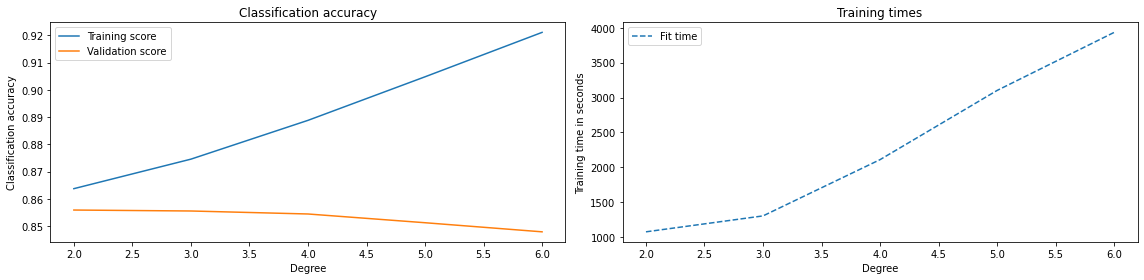

In [ ]:
plt.figure(figsize=(16, 4))
accuracy = plt.subplot(121)
# second y axis for timings
timescale = plt.subplot(122)

accuracy.plot(degrees, train_scores, label="Training score")
accuracy.plot(degrees, val_scores, label="Validation score")

timescale.plot(degrees, time_scores, '--',
               label='Fit time')


# legends and labels
accuracy.set_title("Classification accuracy")
timescale.set_title("Training times")
# accuracy.set_xlim(sample_sizes[0], sample_sizes[-1])
# accuracy.set_xticks(())
# accuracy.set_ylim(0.84, 0.95)
# accuracy.set_yticks(())
timescale.set_xlabel("Degree")
accuracy.set_xlabel("Degree")
accuracy.set_ylabel("Classification accuracy")
timescale.set_ylabel("Training time in seconds")
accuracy.legend(loc='best')
timescale.legend(loc='best')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
C_values = [0.1, 10, 100]
degrees = [2, 3, 4, 5]
time_scores = []
train_scores = []
val_scores = []
poly_models = []
OUTPUT_DIR = 'poly_degree_C'

In [ ]:
for C_val in C_values:
    for degree in tqdm(degrees, desc='Polynomial kernel'):
        print()
        print('Degree: {}'.format(degree))
        print('C: {}'.format(C_val))
        poly_svm = SVC(kernel='poly', degree=degree, C=C_val)
        start = time.time()
        _ = poly_svm.fit(X_train_scaled, y_train)
        time_scores.append(time.time() - start)
        train_score = poly_svm.score(X_train_scaled, y_train) 
        val_score = poly_svm.score(X_val_scaled, y_val)
        train_scores.append(train_score)
        val_scores.append(val_score)
        poly_models.append(poly_svm)
        pkl_filename = 'poly_svm_degree_' + str(degree) + '_C_' + str(C_val) + '.pkl'
        with open(os.path.join(OUTPUT_DIR, pkl_filename), 'wb') as file:
            pickle.dump(poly_svm, file)
        print('Training score: {}'.format(train_score))
        print('Validation score: {}'.format(val_score))
        print('-'*100)

###### C

In [ ]:
os.listdir('poly_C')
poly_C_result = []
for file in os.listdir('poly_C'):
    with open(os.path.join('poly_C', file), 'rb') as f:
        poly_C_result.append(pickle.load(f))    

In [ ]:
poly_C_result

[{'fit_time': 1074.045509338379,
  'model': SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  'train_score': 0.8240607452501566,
  'validation_score': 0.8223814337831304},
 {'fit_time': 1065.4431457519531,
  'model': SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  'train_score': 0.8534663692405745,
  'validation_score': 0.848270405696453},
 {'fit_time': 1570.5745701789856,
  'model': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, ra

In [ ]:
poly_C_values = []
poly_C_train_scores = []
poly_C_val_scores = []
for res in poly_C_result:
    poly_C_values.append(res['model'].get_params()['C'])
    poly_C_train_scores.append(res['train_score'])
    poly_C_val_scores.append(res['validation_score'])

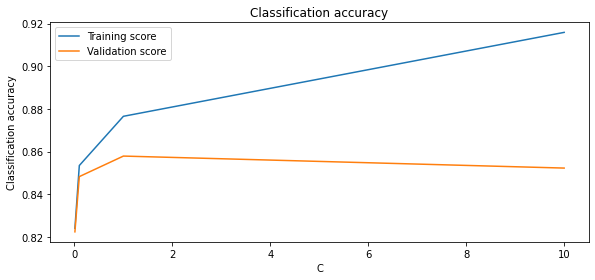

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(16, 4))
accuracy = plt.subplot(121)
# second y axis for timings
# timescale = plt.subplot(122)

accuracy.plot(poly_C_values, poly_C_train_scores, label="Training score")
accuracy.plot(poly_C_values, poly_C_val_scores, label="Validation score")

# timescale.plot(degrees, time_scores, '--',
#                label='Fit time')


# legends and labels
accuracy.set_title("Classification accuracy")
# timescale.set_title("Training times")
# accuracy.set_xlim(sample_sizes[0], sample_sizes[-1])
# accuracy.set_xticks(())
# accuracy.set_ylim(0.84, 0.95)
# accuracy.set_yticks(())
# timescale.set_xlabel("Degree")
accuracy.set_xlabel("C")
accuracy.set_ylabel("Classification accuracy")
# timescale.set_ylabel("Training time in seconds")
accuracy.legend(loc='best')
# timescale.legend(loc='best')
plt.tight_layout()
plt.legend()
plt.show()

##### RBF Kernel

###### C

In [ ]:
C_range = [1e-3, 1e-2, .1, 1, 10, 100, 1000, 1e4]
rbf_models = []
train_scores = []
val_scores = []
time_scores = []
SAVE_DIR = 'rbf_gridsearch_C'

In [ ]:
for C_val in tqdm(C_range, desc="C values"):
    pkl_filename = 'rbf_svm_C_' + str(C_val) + '.pkl'
    if os.path.isfile(os.path.join(SAVE_DIR, pkl_filename)):
        continue 
    print()
    print('C: {}'.format(C_val))
    start = time.time()
    rbf_svm = SVC(C=C_val)
    _ = rbf_svm.fit(X_train_transformed_split, y_train_split)
    train_score = rbf_svm.score(X_train_transformed_split, y_train_split)
    val_score = rbf_svm.score(X_val_transformed, y_val)
    time_scores.append(time.time() - start)
    train_scores.append(train_score)
    val_scores.append(val_score)
    rbf_models.append(rbf_svm)
    with open(os.path.join(SAVE_DIR, pkl_filename), 'wb') as file:
        pickle.dump(rbf_svm, file)
    print('Training score: {}'.format(train_score))
    print('Validation score: {}'.format(val_score))
    print('-'*100)

C values:   0%|          | 0/8 [00:00<?, ?it/s]


C: 100


C values:  75%|███████▌  | 6/8 [3:51:35<1:17:11, 2315.90s/it]

Training score: 0.9775830334331475
Validation score: 0.8269875281577935
----------------------------------------------------------------------------------------------------

C: 1000


###### Gamma

In [ ]:
# gamma_range = [1e-3, 1e-2, .1, 1, 10, 100, 1e4]
gamma_range = ['auto', 'scale', 1e-3, 1e-2, .1, 1, 10, 1000]
rbf_models = []
train_scores = []
val_scores = []
time_scores = []

In [ ]:
for gamma in tqdm(gamma_range, desc="Gamma tuning"):
    print()
    print('Gamma: {}'.format(gamma))
    rbf_svm = SVC(gamma=gamma)
    start = time.time()
    _ = rbf_svm.fit(X_train_scaled, y_train)
    rbf_models.append(rbf_svm)
    time_scores.append(time.time() - start)
    train_score = rbf_svm.score(X_train_scaled, y_train)
    val_score = rbf_svm.score(X_val_scaled, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)
    print('Training score: {}'.format(train_score))
    print('Validation score: {}'.format(val_score))
    print('-'*100)

###### C and gamma

In [ ]:
params = {"C": [10, 0.1, 1 , 100], "gamma": ["scale", 0.1, 1, 10]}
OUTPUT_DIR = 'rbf_C_gamma_new'

In [ ]:
rbf_c_gamma_result = train(SVC(), params, X_train_transformed_split, X_val_transformed, y_train_split, y_val, OUTPUT_DIR, prefix='rbf_')

  0%|          | 0/16 [00:00<?, ?it/s]

[{'C': 10, 'gamma': 'scale'}, {'C': 10, 'gamma': 0.1}, {'C': 10, 'gamma': 1}, {'C': 10, 'gamma': 10}, {'C': 0.1, 'gamma': 'scale'}, {'C': 0.1, 'gamma': 0.1}, {'C': 0.1, 'gamma': 1}, {'C': 0.1, 'gamma': 10}, {'C': 1, 'gamma': 'scale'}, {'C': 1, 'gamma': 0.1}, {'C': 1, 'gamma': 1}, {'C': 1, 'gamma': 10}, {'C': 100, 'gamma': 'scale'}, {'C': 100, 'gamma': 0.1}, {'C': 100, 'gamma': 1}, {'C': 100, 'gamma': 10}]

C: 10
gamma: scale


  6%|▋         | 1/16 [1:26:48<21:42:04, 5208.30s/it]

Saving model information to rbf_C_gamma_new/rbf_C_10_gamma_scale.pkl
Train score: 0.9106183312638045
Validation score: 0.856094237615929
----------------------------------------------------------------------------------------------------

C: 10
gamma: 0.1


 12%|█▎        | 2/16 [2:36:18<19:02:37, 4896.97s/it]

Saving model information to rbf_C_gamma_new/rbf_C_10_gamma_0.1.pkl
Train score: 0.9029922090480533
Validation score: 0.8558744670563931
----------------------------------------------------------------------------------------------------

C: 10
gamma: 1


 19%|█▉        | 3/16 [4:47:02<20:52:33, 5781.08s/it]

Saving model information to rbf_C_gamma_new/rbf_C_10_gamma_1.pkl
Train score: 0.9961319956484951
Validation score: 0.8107335941277306
----------------------------------------------------------------------------------------------------

C: 10
gamma: 10


In [ ]:
C_range = [10, 100, 1000, 1e4]
# gamma_range = [0.05, 0.1, 1, 10]
gamma_range = [0.05, 0.075, 0.1]
# param_grid = dict(gamma=gamma_range, C=C_range)
rbf_models = []
train_rbf_scores = []
val_rbf_scores = []
time_rbf_scores = []
OUTPUT_DIR = 'rbf_C_gamma'

In [ ]:
for C_val in tqdm(C_range, desc="C values"):
    for gamma_val in tqdm(gamma_range, desc="Gamma values"):
        pkl_filename = 'rbf_C_' + str(C_val) + '_gamma_' + str(gamma_val)  + '.pkl'
        if os.path.isfile(os.path.join(OUTPUT_DIR, pkl_filename)):
            continue
        print()
        print('C: {}, gamma: {}'.format(C_val, gamma_val))
        start = time.time()
        rbf_svm = SVC(C=C_val, gamma=gamma_val)
        _ = rbf_svm.fit(X_train_transformed_split, y_train_split)
        train_score = rbf_svm.score(X_train_transformed_split, y_train_split)
        val_score = rbf_svm.score(X_val_transformed, y_val)
        time_rbf_scores.append(time.time() - start)
        train_rbf_scores.append(train_score)
        val_rbf_scores.append(val_score)
        rbf_models.append(rbf_svm)
        
        with open(os.path.join(OUTPUT_DIR, pkl_filename), 'wb') as file:
            pickle.dump(rbf_svm, file)
        print('Training score: {}'.format(train_score))
        print('Validation score: {}'.format(val_score))
        print('-'*100)

Gamma values:   0%|          | 0/3 [00:00<?, ?it/s]


C: 10, gamma: 0.075



Gamma values:   0%|          | 0/3 [00:00<?, ?it/s]

Training score: 0.889553091656319
Validation score: 0.857149136301701
----------------------------------------------------------------------------------------------------

C: 100, gamma: 0.05


#### Decision Tree

In [ ]:
output_dir = "../saved_models/decision_tree"
prefix = 'DTree'

In [ ]:
param_grid = {'max_depth': np.arange(1, 10),
                  'min_samples_split': np.arange(2,13),
                  'min_samples_leaf': np.arange(2,13)}

In [ ]:
result = train('decision_tree', param_grid, X_train_tranformed_split, X_val_tranformed, y_train_split, y_val, output_dir, prefix)

  0%|          | 0/1089 [00:00<?, ?it/s]


max_depth: 1
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  0%|          | 1/1089 [00:00<09:34,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  0%|          | 2/1089 [00:01<09:38,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  0%|          | 3/1089 [00:01<09:35,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  0%|          | 4/1089 [00:02<09:34,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  0%|          | 5/1089 [00:02<09:37,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 6/1089 [00:03<09:39,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 7/1089 [00:03<09:35,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 8/1089 [00:04<09:37,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 9/1089 [00:04<09:33,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 10/1089 [00:05<09:31,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 11/1089 [00:05<09:29,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 12/1089 [00:06<09:30,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|          | 13/1089 [00:06<09:30,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|▏         | 14/1089 [00:07<09:27,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|▏         | 15/1089 [00:07<09:28,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  1%|▏         | 16/1089 [00:08<09:29,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 17/1089 [00:09<09:29,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 18/1089 [00:09<09:24,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 19/1089 [00:10<09:30,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 20/1089 [00:10<09:28,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 21/1089 [00:11<09:27,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 22/1089 [00:11<09:25,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 23/1089 [00:12<09:23,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 24/1089 [00:12<09:25,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 25/1089 [00:13<09:23,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 26/1089 [00:13<09:21,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  2%|▏         | 27/1089 [00:14<09:19,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 28/1089 [00:14<09:19,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 29/1089 [00:15<09:21,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 30/1089 [00:15<09:19,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 31/1089 [00:16<09:18,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 32/1089 [00:16<09:21,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 33/1089 [00:17<09:20,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 34/1089 [00:18<09:22,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 35/1089 [00:18<09:22,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 36/1089 [00:19<09:21,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 37/1089 [00:19<09:18,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  3%|▎         | 38/1089 [00:20<09:15,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▎         | 39/1089 [00:20<09:12,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▎         | 40/1089 [00:21<09:13,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 41/1089 [00:21<09:12,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 42/1089 [00:22<09:12,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 43/1089 [00:22<09:13,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 44/1089 [00:23<09:12,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 45/1089 [00:23<09:13,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 46/1089 [00:24<09:12,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 47/1089 [00:24<09:11,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 48/1089 [00:25<09:11,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  4%|▍         | 49/1089 [00:25<09:09,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▍         | 50/1089 [00:26<09:10,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▍         | 51/1089 [00:27<09:10,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▍         | 52/1089 [00:27<09:09,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▍         | 53/1089 [00:28<09:08,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▍         | 54/1089 [00:28<09:07,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▌         | 55/1089 [00:29<09:04,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▌         | 56/1089 [00:29<09:08,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▌         | 57/1089 [00:30<09:07,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▌         | 58/1089 [00:30<09:05,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  5%|▌         | 59/1089 [00:31<09:04,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 60/1089 [00:31<09:04,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 61/1089 [00:32<09:05,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 62/1089 [00:32<09:07,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 63/1089 [00:33<09:07,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 64/1089 [00:33<09:04,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 65/1089 [00:34<09:02,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 66/1089 [00:34<09:02,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 67/1089 [00:35<09:01,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▌         | 68/1089 [00:36<09:00,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▋         | 69/1089 [00:36<09:00,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  6%|▋         | 70/1089 [00:37<08:58,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 71/1089 [00:37<09:01,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 72/1089 [00:38<09:01,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 73/1089 [00:38<08:59,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 74/1089 [00:39<08:57,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 75/1089 [00:39<08:57,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 76/1089 [00:40<08:55,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 77/1089 [00:40<08:55,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 78/1089 [00:41<08:55,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 79/1089 [00:41<08:56,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 80/1089 [00:42<08:54,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  7%|▋         | 81/1089 [00:42<08:52,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 82/1089 [00:43<08:50,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 83/1089 [00:43<08:51,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 84/1089 [00:44<08:51,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 85/1089 [00:45<08:48,  1.90it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 86/1089 [00:45<08:50,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 87/1089 [00:46<08:49,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 88/1089 [00:46<08:48,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 89/1089 [00:47<08:53,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 90/1089 [00:47<08:51,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 91/1089 [00:48<08:51,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  8%|▊         | 92/1089 [00:48<08:49,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▊         | 93/1089 [00:49<08:48,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▊         | 94/1089 [00:49<08:47,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▊         | 95/1089 [00:50<08:46,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 96/1089 [00:50<08:46,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 97/1089 [00:51<08:44,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 98/1089 [00:51<08:46,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 99/1089 [00:52<08:43,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 100/1089 [00:53<08:45,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 101/1089 [00:53<08:47,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 102/1089 [00:54<08:43,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


  9%|▉         | 103/1089 [00:54<08:44,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|▉         | 104/1089 [00:55<08:44,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|▉         | 105/1089 [00:55<08:44,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|▉         | 106/1089 [00:56<08:43,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|▉         | 107/1089 [00:56<08:43,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|▉         | 108/1089 [00:57<08:41,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|█         | 109/1089 [00:57<08:42,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|█         | 110/1089 [00:58<08:40,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|█         | 111/1089 [00:58<08:42,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|█         | 112/1089 [00:59<08:37,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|█         | 113/1089 [00:59<08:37,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 10%|█         | 114/1089 [01:00<08:37,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 115/1089 [01:00<08:35,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 116/1089 [01:01<08:35,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 117/1089 [01:02<08:35,  1.89it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 118/1089 [01:02<08:38,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 119/1089 [01:03<08:38,  1.87it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 120/1089 [01:03<08:36,  1.88it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 1
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 121/1089 [01:04<08:39,  1.86it/s]

Train score: 0.7939848136874609
Validation score: 0.7932398575886774
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█         | 122/1089 [01:04<09:15,  1.74it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█▏        | 123/1089 [01:05<09:38,  1.67it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█▏        | 124/1089 [01:06<09:54,  1.62it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 11%|█▏        | 125/1089 [01:06<10:10,  1.58it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 126/1089 [01:07<10:17,  1.56it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 127/1089 [01:08<10:25,  1.54it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 128/1089 [01:08<10:30,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 129/1089 [01:09<10:28,  1.53it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 130/1089 [01:10<10:31,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 131/1089 [01:10<10:33,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 132/1089 [01:11<10:33,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 133/1089 [01:12<10:31,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 134/1089 [01:12<10:29,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 135/1089 [01:13<10:27,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 12%|█▏        | 136/1089 [01:14<10:30,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 137/1089 [01:14<10:32,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 138/1089 [01:15<10:28,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 139/1089 [01:16<10:30,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 140/1089 [01:16<10:27,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 141/1089 [01:17<10:26,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 142/1089 [01:18<10:23,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 143/1089 [01:18<10:24,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 144/1089 [01:19<10:27,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 145/1089 [01:20<10:25,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 146/1089 [01:20<10:23,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 13%|█▎        | 147/1089 [01:21<10:21,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▎        | 148/1089 [01:22<10:23,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▎        | 149/1089 [01:22<10:21,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 150/1089 [01:23<10:22,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 151/1089 [01:24<10:21,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 152/1089 [01:24<10:19,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 153/1089 [01:25<10:17,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 154/1089 [01:26<10:15,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 155/1089 [01:26<10:15,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 156/1089 [01:27<10:15,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 14%|█▍        | 157/1089 [01:28<10:15,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▍        | 158/1089 [01:28<10:16,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▍        | 159/1089 [01:29<10:13,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▍        | 160/1089 [01:29<10:12,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▍        | 161/1089 [01:30<10:12,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▍        | 162/1089 [01:31<10:13,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▍        | 163/1089 [01:31<10:12,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▌        | 164/1089 [01:32<10:15,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▌        | 165/1089 [01:33<10:15,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▌        | 166/1089 [01:33<10:12,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▌        | 167/1089 [01:34<10:11,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 15%|█▌        | 168/1089 [01:35<10:11,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 169/1089 [01:35<10:08,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 170/1089 [01:36<10:09,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 171/1089 [01:37<10:10,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 172/1089 [01:37<10:09,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 173/1089 [01:38<10:09,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 174/1089 [01:39<10:07,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 175/1089 [01:39<10:07,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▌        | 176/1089 [01:40<10:05,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▋        | 177/1089 [01:41<10:06,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▋        | 178/1089 [01:41<10:07,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 16%|█▋        | 179/1089 [01:42<10:05,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 180/1089 [01:43<10:03,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 181/1089 [01:43<10:00,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 182/1089 [01:44<10:02,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 183/1089 [01:45<10:00,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 184/1089 [01:45<09:59,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 185/1089 [01:46<10:01,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 186/1089 [01:47<10:00,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 187/1089 [01:47<09:57,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 188/1089 [01:48<09:58,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 189/1089 [01:49<09:59,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 17%|█▋        | 190/1089 [01:49<09:57,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 191/1089 [01:50<09:57,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 192/1089 [01:51<09:54,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 193/1089 [01:51<09:54,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 194/1089 [01:52<09:56,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 195/1089 [01:53<09:54,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 196/1089 [01:53<09:54,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 197/1089 [01:54<09:51,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 198/1089 [01:55<09:48,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 199/1089 [01:55<09:49,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 200/1089 [01:56<09:52,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 18%|█▊        | 201/1089 [01:57<09:49,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▊        | 202/1089 [01:57<09:49,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▊        | 203/1089 [01:58<09:50,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▊        | 204/1089 [01:59<09:46,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 205/1089 [01:59<09:44,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 206/1089 [02:00<09:45,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 207/1089 [02:01<09:41,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 208/1089 [02:01<09:41,  1.52it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 209/1089 [02:02<09:42,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 210/1089 [02:03<09:41,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 211/1089 [02:03<09:40,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 19%|█▉        | 212/1089 [02:04<09:45,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|█▉        | 213/1089 [02:05<09:45,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|█▉        | 214/1089 [02:05<09:44,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|█▉        | 215/1089 [02:06<09:43,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|█▉        | 216/1089 [02:07<09:44,  1.49it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|█▉        | 217/1089 [02:07<09:43,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|██        | 218/1089 [02:08<09:43,  1.49it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|██        | 219/1089 [02:09<09:39,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|██        | 220/1089 [02:09<09:40,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|██        | 221/1089 [02:10<09:36,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|██        | 222/1089 [02:11<09:37,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 20%|██        | 223/1089 [02:11<09:37,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 224/1089 [02:12<09:35,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 225/1089 [02:13<09:39,  1.49it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 226/1089 [02:13<09:35,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 227/1089 [02:14<09:32,  1.51it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 228/1089 [02:15<09:32,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 229/1089 [02:15<09:34,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 230/1089 [02:16<09:31,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██        | 231/1089 [02:17<09:33,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██▏       | 232/1089 [02:17<09:33,  1.49it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██▏       | 233/1089 [02:18<09:32,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 21%|██▏       | 234/1089 [02:19<09:31,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 235/1089 [02:19<09:29,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 236/1089 [02:20<09:28,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 237/1089 [02:21<09:27,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 238/1089 [02:21<09:28,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 239/1089 [02:22<09:26,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 240/1089 [02:23<09:29,  1.49it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 241/1089 [02:23<09:26,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 2
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 242/1089 [02:24<09:24,  1.50it/s]

Train score: 0.8187642165642891
Validation score: 0.818117884928135
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 243/1089 [02:25<10:03,  1.40it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 244/1089 [02:26<10:24,  1.35it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 22%|██▏       | 245/1089 [02:26<10:42,  1.31it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 246/1089 [02:27<10:53,  1.29it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 247/1089 [02:28<11:00,  1.27it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 248/1089 [02:29<11:08,  1.26it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 249/1089 [02:30<11:34,  1.21it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 250/1089 [02:31<11:29,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 251/1089 [02:31<11:27,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 252/1089 [02:32<11:24,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 253/1089 [02:33<11:22,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 254/1089 [02:34<11:19,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 23%|██▎       | 255/1089 [02:35<11:15,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▎       | 256/1089 [02:35<11:13,  1.24it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▎       | 257/1089 [02:36<11:11,  1.24it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▎       | 258/1089 [02:37<11:11,  1.24it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 259/1089 [02:38<11:10,  1.24it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 260/1089 [02:39<11:10,  1.24it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 261/1089 [02:40<11:10,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 262/1089 [02:40<11:10,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 263/1089 [02:41<11:10,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 264/1089 [02:42<11:08,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 265/1089 [02:43<11:08,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 24%|██▍       | 266/1089 [02:44<11:07,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▍       | 267/1089 [02:44<11:07,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▍       | 268/1089 [02:45<11:07,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▍       | 269/1089 [02:46<11:07,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▍       | 270/1089 [02:47<11:08,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▍       | 271/1089 [02:48<11:05,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▍       | 272/1089 [02:48<11:02,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▌       | 273/1089 [02:49<11:03,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▌       | 274/1089 [02:50<11:03,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▌       | 275/1089 [02:51<11:02,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▌       | 276/1089 [02:52<11:02,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 25%|██▌       | 277/1089 [02:53<10:59,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 278/1089 [02:53<10:57,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 279/1089 [02:54<10:57,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 280/1089 [02:55<10:57,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 281/1089 [02:56<10:56,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 282/1089 [02:57<10:54,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 283/1089 [02:57<10:54,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 284/1089 [02:58<10:53,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▌       | 285/1089 [02:59<10:52,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▋       | 286/1089 [03:00<10:50,  1.24it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▋       | 287/1089 [03:01<10:49,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 26%|██▋       | 288/1089 [03:01<10:53,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 289/1089 [03:02<10:53,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 290/1089 [03:03<10:50,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 291/1089 [03:04<10:51,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 292/1089 [03:05<10:48,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 293/1089 [03:06<10:51,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 294/1089 [03:06<10:47,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 295/1089 [03:07<10:49,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 296/1089 [03:08<10:49,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 297/1089 [03:09<10:43,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 298/1089 [03:10<10:42,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 27%|██▋       | 299/1089 [03:10<10:40,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 300/1089 [03:11<10:38,  1.24it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 301/1089 [03:12<10:39,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 302/1089 [03:13<10:38,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 303/1089 [03:14<11:13,  1.17it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 304/1089 [03:15<11:31,  1.14it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 305/1089 [03:16<11:44,  1.11it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 306/1089 [03:17<11:53,  1.10it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 307/1089 [03:18<11:54,  1.10it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 308/1089 [03:19<12:03,  1.08it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 309/1089 [03:19<12:14,  1.06it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 28%|██▊       | 310/1089 [03:20<12:23,  1.05it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▊       | 311/1089 [03:22<13:19,  1.03s/it]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▊       | 312/1089 [03:23<12:30,  1.03it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▊       | 313/1089 [03:23<11:54,  1.09it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 314/1089 [03:24<11:28,  1.13it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 315/1089 [03:25<11:10,  1.15it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 316/1089 [03:26<10:56,  1.18it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 317/1089 [03:27<10:48,  1.19it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 318/1089 [03:27<10:40,  1.20it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 319/1089 [03:28<10:34,  1.21it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 320/1089 [03:29<10:33,  1.21it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 29%|██▉       | 321/1089 [03:30<10:28,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|██▉       | 322/1089 [03:31<10:26,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|██▉       | 323/1089 [03:31<10:25,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|██▉       | 324/1089 [03:32<10:22,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|██▉       | 325/1089 [03:33<10:27,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|██▉       | 326/1089 [03:34<10:25,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|███       | 327/1089 [03:35<10:24,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|███       | 328/1089 [03:36<10:23,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|███       | 329/1089 [03:36<10:20,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|███       | 330/1089 [03:37<10:18,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|███       | 331/1089 [03:38<10:19,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 30%|███       | 332/1089 [03:39<10:16,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 333/1089 [03:40<10:13,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 334/1089 [03:40<10:15,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 335/1089 [03:41<10:13,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 336/1089 [03:42<10:13,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 337/1089 [03:43<10:12,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 338/1089 [03:44<10:12,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 339/1089 [03:45<10:16,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███       | 340/1089 [03:45<10:12,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███▏      | 341/1089 [03:46<10:14,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███▏      | 342/1089 [03:47<10:14,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 31%|███▏      | 343/1089 [03:48<10:14,  1.21it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 344/1089 [03:49<10:10,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 345/1089 [03:49<10:08,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 346/1089 [03:50<10:11,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 347/1089 [03:51<10:08,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 348/1089 [03:52<10:08,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 349/1089 [03:53<10:07,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 350/1089 [03:54<10:06,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 351/1089 [03:54<10:04,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 352/1089 [03:55<10:04,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 32%|███▏      | 353/1089 [03:56<10:03,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 354/1089 [03:57<10:06,  1.21it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 355/1089 [03:58<10:02,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 356/1089 [03:58<09:58,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 357/1089 [03:59<09:55,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 358/1089 [04:00<09:56,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 359/1089 [04:01<09:54,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 360/1089 [04:02<09:54,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 361/1089 [04:03<09:52,  1.23it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 362/1089 [04:03<09:54,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 3
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 363/1089 [04:04<09:53,  1.22it/s]

Train score: 0.8274342604089975
Validation score: 0.8288866423453914
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 33%|███▎      | 364/1089 [04:05<10:27,  1.16it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▎      | 365/1089 [04:06<10:47,  1.12it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▎      | 366/1089 [04:07<11:06,  1.08it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▎      | 367/1089 [04:08<11:17,  1.07it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 368/1089 [04:09<11:24,  1.05it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 369/1089 [04:10<11:25,  1.05it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 370/1089 [04:11<11:27,  1.05it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 371/1089 [04:12<11:29,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 372/1089 [04:13<11:31,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 373/1089 [04:14<11:28,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 374/1089 [04:15<11:28,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 34%|███▍      | 375/1089 [04:16<11:27,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▍      | 376/1089 [04:17<11:27,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▍      | 377/1089 [04:18<11:27,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▍      | 378/1089 [04:19<11:26,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▍      | 379/1089 [04:20<11:23,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▍      | 380/1089 [04:21<11:24,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▍      | 381/1089 [04:22<11:23,  1.04it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▌      | 382/1089 [04:23<11:26,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▌      | 383/1089 [04:24<11:24,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▌      | 384/1089 [04:25<11:23,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▌      | 385/1089 [04:25<11:23,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 35%|███▌      | 386/1089 [04:26<11:25,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 387/1089 [04:27<11:21,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 388/1089 [04:28<11:20,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 389/1089 [04:29<11:17,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 390/1089 [04:30<11:17,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 391/1089 [04:31<11:16,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 392/1089 [04:32<11:14,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 393/1089 [04:33<11:16,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▌      | 394/1089 [04:34<11:15,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▋      | 395/1089 [04:35<11:14,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▋      | 396/1089 [04:36<11:11,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 36%|███▋      | 397/1089 [04:37<11:09,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 398/1089 [04:38<11:12,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 399/1089 [04:39<11:10,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 400/1089 [04:40<11:07,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 401/1089 [04:41<11:09,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 402/1089 [04:42<11:06,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 403/1089 [04:43<11:03,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 404/1089 [04:44<11:03,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 405/1089 [04:45<11:03,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 406/1089 [04:46<11:03,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 407/1089 [04:47<11:00,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 37%|███▋      | 408/1089 [04:48<11:04,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 409/1089 [04:49<11:04,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 410/1089 [04:50<11:03,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 411/1089 [04:51<11:06,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 412/1089 [04:52<11:04,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 413/1089 [04:53<11:03,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 414/1089 [04:54<11:01,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 415/1089 [04:55<10:58,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 416/1089 [04:56<10:56,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 417/1089 [04:57<10:55,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 418/1089 [04:58<10:52,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 38%|███▊      | 419/1089 [04:59<10:50,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▊      | 420/1089 [05:00<10:51,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▊      | 421/1089 [05:01<10:51,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 422/1089 [05:02<10:50,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 423/1089 [05:02<10:47,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 424/1089 [05:03<10:50,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 425/1089 [05:04<10:51,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 426/1089 [05:05<10:50,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 427/1089 [05:06<10:49,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 428/1089 [05:07<10:50,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 429/1089 [05:08<10:48,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 39%|███▉      | 430/1089 [05:09<10:45,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|███▉      | 431/1089 [05:10<10:41,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|███▉      | 432/1089 [05:11<10:40,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|███▉      | 433/1089 [05:12<10:36,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|███▉      | 434/1089 [05:13<10:36,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|███▉      | 435/1089 [05:14<10:38,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|████      | 436/1089 [05:15<10:39,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|████      | 437/1089 [05:16<10:38,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|████      | 438/1089 [05:17<10:38,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|████      | 439/1089 [05:18<10:35,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|████      | 440/1089 [05:19<10:32,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 40%|████      | 441/1089 [05:20<10:31,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 442/1089 [05:21<10:28,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 443/1089 [05:22<10:28,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 444/1089 [05:23<10:28,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 445/1089 [05:24<10:26,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 446/1089 [05:25<10:23,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 447/1089 [05:26<10:22,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 448/1089 [05:27<10:24,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████      | 449/1089 [05:28<10:20,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████▏     | 450/1089 [05:29<10:19,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 41%|████▏     | 451/1089 [05:30<10:19,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 452/1089 [05:31<10:18,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 453/1089 [05:32<10:16,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 454/1089 [05:33<10:16,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 455/1089 [05:34<10:14,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 456/1089 [05:35<10:15,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 457/1089 [05:36<10:16,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 458/1089 [05:37<10:13,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 459/1089 [05:38<10:13,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 460/1089 [05:39<10:10,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 461/1089 [05:39<10:08,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 42%|████▏     | 462/1089 [05:40<10:07,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 463/1089 [05:41<10:07,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 464/1089 [05:42<10:06,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 465/1089 [05:43<10:06,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 466/1089 [05:44<10:06,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 467/1089 [05:45<10:04,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 468/1089 [05:46<10:04,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 469/1089 [05:47<10:03,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 470/1089 [05:48<10:01,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 471/1089 [05:49<10:04,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 472/1089 [05:50<10:04,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 43%|████▎     | 473/1089 [05:51<10:03,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▎     | 474/1089 [05:52<10:04,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▎     | 475/1089 [05:53<10:02,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▎     | 476/1089 [05:54<10:00,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 477/1089 [05:55<10:00,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 478/1089 [05:56<10:00,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 479/1089 [05:57<09:56,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 480/1089 [05:58<09:55,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 481/1089 [05:59<09:54,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 482/1089 [06:00<09:52,  1.02it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 483/1089 [06:01<09:48,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 4
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 44%|████▍     | 484/1089 [06:02<09:46,  1.03it/s]

Train score: 0.8331593463951737
Validation score: 0.8319634301788932
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▍     | 485/1089 [06:03<10:14,  1.02s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▍     | 486/1089 [06:04<10:39,  1.06s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▍     | 487/1089 [06:05<10:51,  1.08s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▍     | 488/1089 [06:07<11:03,  1.10s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▍     | 489/1089 [06:08<11:09,  1.12s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▍     | 490/1089 [06:09<11:13,  1.12s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▌     | 491/1089 [06:10<11:13,  1.13s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▌     | 492/1089 [06:11<11:14,  1.13s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▌     | 493/1089 [06:12<11:14,  1.13s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▌     | 494/1089 [06:13<11:13,  1.13s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 45%|████▌     | 495/1089 [06:14<11:14,  1.13s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 496/1089 [06:16<11:14,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 497/1089 [06:17<11:12,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 498/1089 [06:18<11:11,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 499/1089 [06:19<11:11,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 500/1089 [06:20<11:09,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 501/1089 [06:21<11:07,  1.13s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 502/1089 [06:22<11:07,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▌     | 503/1089 [06:24<11:05,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▋     | 504/1089 [06:25<11:07,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▋     | 505/1089 [06:26<11:06,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 46%|████▋     | 506/1089 [06:27<11:04,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 507/1089 [06:28<11:03,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 508/1089 [06:29<11:02,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 509/1089 [06:30<11:02,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 510/1089 [06:32<10:58,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 511/1089 [06:33<10:58,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 512/1089 [06:34<10:58,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 513/1089 [06:35<10:56,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 514/1089 [06:36<10:55,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 515/1089 [06:37<10:52,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 516/1089 [06:38<10:52,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 47%|████▋     | 517/1089 [06:40<10:50,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 518/1089 [06:41<10:48,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 519/1089 [06:42<10:48,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 520/1089 [06:43<10:49,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 521/1089 [06:44<10:48,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 522/1089 [06:45<10:47,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 523/1089 [06:46<10:46,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 524/1089 [06:48<10:44,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 525/1089 [06:49<10:42,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 526/1089 [06:50<10:40,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 527/1089 [06:51<10:36,  1.13s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 48%|████▊     | 528/1089 [06:52<10:36,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▊     | 529/1089 [06:53<10:37,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▊     | 530/1089 [06:54<10:35,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 531/1089 [06:55<10:35,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 532/1089 [06:57<10:35,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 533/1089 [06:58<10:33,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 534/1089 [06:59<10:30,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 535/1089 [07:00<10:29,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 536/1089 [07:01<10:32,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 537/1089 [07:02<10:28,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 538/1089 [07:03<10:29,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 49%|████▉     | 539/1089 [07:05<10:31,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|████▉     | 540/1089 [07:06<10:29,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|████▉     | 541/1089 [07:07<10:27,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|████▉     | 542/1089 [07:08<10:26,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|████▉     | 543/1089 [07:09<10:26,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|████▉     | 544/1089 [07:10<10:25,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|█████     | 545/1089 [07:11<10:22,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|█████     | 546/1089 [07:13<10:21,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|█████     | 547/1089 [07:14<10:18,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|█████     | 548/1089 [07:15<10:15,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 50%|█████     | 549/1089 [07:16<10:14,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 550/1089 [07:17<10:15,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 551/1089 [07:18<10:13,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 552/1089 [07:19<10:16,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 553/1089 [07:21<10:12,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 554/1089 [07:22<10:14,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 555/1089 [07:23<10:13,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 556/1089 [07:24<10:09,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 557/1089 [07:25<10:07,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████     | 558/1089 [07:26<10:06,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████▏    | 559/1089 [07:27<10:03,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 51%|█████▏    | 560/1089 [07:29<10:04,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 561/1089 [07:30<10:02,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 562/1089 [07:31<09:58,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 563/1089 [07:32<09:58,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 564/1089 [07:33<09:58,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 565/1089 [07:34<09:58,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 566/1089 [07:35<09:57,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 567/1089 [07:37<09:57,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 568/1089 [07:38<09:56,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 569/1089 [07:39<09:53,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 570/1089 [07:40<09:52,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 52%|█████▏    | 571/1089 [07:41<09:54,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 572/1089 [07:42<09:51,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 573/1089 [07:43<09:51,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 574/1089 [07:45<09:50,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 575/1089 [07:46<09:50,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 576/1089 [07:47<09:48,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 577/1089 [07:48<09:46,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 578/1089 [07:49<09:44,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 579/1089 [07:50<09:42,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 580/1089 [07:51<09:42,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 581/1089 [07:53<09:41,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 53%|█████▎    | 582/1089 [07:54<09:38,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▎    | 583/1089 [07:55<09:38,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▎    | 584/1089 [07:56<09:38,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▎    | 585/1089 [07:57<09:38,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 586/1089 [07:58<09:34,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 587/1089 [08:00<09:34,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 588/1089 [08:01<09:32,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 589/1089 [08:02<09:29,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 590/1089 [08:03<09:28,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 591/1089 [08:04<09:29,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 592/1089 [08:05<09:28,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 54%|█████▍    | 593/1089 [08:06<09:27,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▍    | 594/1089 [08:08<09:27,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▍    | 595/1089 [08:09<09:25,  1.14s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▍    | 596/1089 [08:10<09:24,  1.15s/it]

Train score: 0.8374668966957133
Validation score: 0.837633510614918
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▍    | 597/1089 [08:11<09:24,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▍    | 598/1089 [08:12<09:21,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▌    | 599/1089 [08:13<09:24,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▌    | 600/1089 [08:14<09:21,  1.15s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▌    | 601/1089 [08:16<09:17,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▌    | 602/1089 [08:17<09:16,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▌    | 603/1089 [08:18<09:15,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 55%|█████▌    | 604/1089 [08:19<09:12,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 5
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 605/1089 [08:20<09:11,  1.14s/it]

Train score: 0.8374339307495358
Validation score: 0.8375895565030108
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 606/1089 [08:21<09:36,  1.19s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 607/1089 [08:23<09:54,  1.23s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 608/1089 [08:24<10:03,  1.25s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 609/1089 [08:25<10:10,  1.27s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 610/1089 [08:27<10:17,  1.29s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 611/1089 [08:28<10:20,  1.30s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▌    | 612/1089 [08:29<10:23,  1.31s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▋    | 613/1089 [08:31<10:25,  1.31s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▋    | 614/1089 [08:32<10:22,  1.31s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 56%|█████▋    | 615/1089 [08:33<10:22,  1.31s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 616/1089 [08:35<10:23,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 617/1089 [08:36<10:20,  1.31s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 618/1089 [08:37<10:20,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 619/1089 [08:39<10:19,  1.32s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 620/1089 [08:40<10:17,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 621/1089 [08:41<10:20,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 622/1089 [08:43<10:20,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 623/1089 [08:44<10:18,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 624/1089 [08:45<10:16,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 625/1089 [08:47<10:14,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 57%|█████▋    | 626/1089 [08:48<10:15,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 627/1089 [08:49<10:13,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 628/1089 [08:50<10:10,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 629/1089 [08:52<10:08,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 630/1089 [08:53<10:06,  1.32s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 631/1089 [08:54<10:04,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 632/1089 [08:56<10:02,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 633/1089 [08:57<10:04,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 634/1089 [08:58<10:01,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 635/1089 [09:00<09:59,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 636/1089 [09:01<09:57,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 58%|█████▊    | 637/1089 [09:02<09:56,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▊    | 638/1089 [09:04<10:03,  1.34s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▊    | 639/1089 [09:05<09:59,  1.33s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 640/1089 [09:06<09:57,  1.33s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 641/1089 [09:08<09:55,  1.33s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 642/1089 [09:09<09:52,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 643/1089 [09:10<09:49,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 644/1089 [09:12<09:49,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 645/1089 [09:13<09:47,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 646/1089 [09:14<09:46,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 59%|█████▉    | 647/1089 [09:16<09:46,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|█████▉    | 648/1089 [09:17<09:43,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|█████▉    | 649/1089 [09:18<09:41,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|█████▉    | 650/1089 [09:20<09:39,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|█████▉    | 651/1089 [09:21<09:37,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|█████▉    | 652/1089 [09:22<09:39,  1.33s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|█████▉    | 653/1089 [09:24<09:38,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|██████    | 654/1089 [09:25<09:35,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|██████    | 655/1089 [09:26<09:33,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|██████    | 656/1089 [09:28<09:35,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|██████    | 657/1089 [09:29<09:32,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 60%|██████    | 658/1089 [09:30<09:29,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 659/1089 [09:32<09:28,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 660/1089 [09:33<09:25,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 661/1089 [09:34<09:25,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 662/1089 [09:35<09:24,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 663/1089 [09:37<09:21,  1.32s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 664/1089 [09:38<09:21,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 665/1089 [09:39<09:20,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 666/1089 [09:41<09:19,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████    | 667/1089 [09:42<09:18,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████▏   | 668/1089 [09:43<09:14,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 61%|██████▏   | 669/1089 [09:45<09:15,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 670/1089 [09:46<09:15,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 671/1089 [09:47<09:12,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 672/1089 [09:49<09:11,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 673/1089 [09:50<09:09,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 674/1089 [09:51<09:07,  1.32s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 675/1089 [09:53<09:07,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 676/1089 [09:54<09:05,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 677/1089 [09:55<09:04,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 678/1089 [09:57<09:03,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 679/1089 [09:58<09:04,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 62%|██████▏   | 680/1089 [09:59<09:02,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 681/1089 [10:01<09:00,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 682/1089 [10:02<08:58,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 683/1089 [10:03<08:57,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 684/1089 [10:05<08:56,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 685/1089 [10:06<08:54,  1.32s/it]

Train score: 0.8404118545542455
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 686/1089 [10:07<08:53,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 687/1089 [10:09<08:52,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 688/1089 [10:10<08:50,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 689/1089 [10:11<08:47,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 690/1089 [10:13<08:47,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 63%|██████▎   | 691/1089 [10:14<08:44,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▎   | 692/1089 [10:15<08:44,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▎   | 693/1089 [10:16<08:44,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▎   | 694/1089 [10:18<08:41,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 695/1089 [10:19<08:39,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 696/1089 [10:20<08:36,  1.31s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 697/1089 [10:22<08:35,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 698/1089 [10:23<08:37,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 699/1089 [10:24<08:35,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 700/1089 [10:26<08:35,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 701/1089 [10:27<08:35,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 64%|██████▍   | 702/1089 [10:28<08:33,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▍   | 703/1089 [10:30<08:31,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▍   | 704/1089 [10:31<08:30,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▍   | 705/1089 [10:32<08:29,  1.33s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▍   | 706/1089 [10:34<08:26,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▍   | 707/1089 [10:35<08:25,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▌   | 708/1089 [10:36<08:26,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▌   | 709/1089 [10:38<08:24,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▌   | 710/1089 [10:39<08:22,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▌   | 711/1089 [10:40<08:22,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▌   | 712/1089 [10:42<08:19,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 65%|██████▌   | 713/1089 [10:43<08:16,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 714/1089 [10:44<08:15,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 715/1089 [10:46<08:14,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 716/1089 [10:47<08:13,  1.32s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 717/1089 [10:48<08:13,  1.33s/it]

Train score: 0.8404228432029713
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 718/1089 [10:50<08:12,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 719/1089 [10:51<08:09,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 720/1089 [10:52<08:08,  1.32s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▌   | 721/1089 [10:54<08:07,  1.33s/it]

Train score: 0.8403898772567937
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▋   | 722/1089 [10:55<08:05,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▋   | 723/1089 [10:56<08:04,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 66%|██████▋   | 724/1089 [10:58<08:04,  1.33s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 725/1089 [10:59<08:02,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 6
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 726/1089 [11:00<08:00,  1.32s/it]

Train score: 0.8403349340131644
Validation score: 0.8382049140697112
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 727/1089 [11:02<08:18,  1.38s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 728/1089 [11:03<08:32,  1.42s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 729/1089 [11:05<08:42,  1.45s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 730/1089 [11:06<08:45,  1.46s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 731/1089 [11:08<08:49,  1.48s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 732/1089 [11:09<08:52,  1.49s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 733/1089 [11:11<08:51,  1.49s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 734/1089 [11:12<08:51,  1.50s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 67%|██████▋   | 735/1089 [11:14<08:50,  1.50s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 736/1089 [11:15<08:51,  1.50s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 737/1089 [11:17<08:47,  1.50s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 738/1089 [11:18<08:49,  1.51s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 739/1089 [11:20<08:46,  1.51s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 740/1089 [11:21<08:47,  1.51s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 741/1089 [11:23<08:45,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 742/1089 [11:24<08:44,  1.51s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 743/1089 [11:26<08:42,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 744/1089 [11:27<08:42,  1.52s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 68%|██████▊   | 745/1089 [11:29<08:39,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▊   | 746/1089 [11:30<08:36,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▊   | 747/1089 [11:32<08:35,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▊   | 748/1089 [11:33<08:33,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 749/1089 [11:35<08:32,  1.51s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 750/1089 [11:36<08:32,  1.51s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 751/1089 [11:38<08:32,  1.52s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 752/1089 [11:39<08:30,  1.52s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 753/1089 [11:41<08:32,  1.52s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 754/1089 [11:43<08:30,  1.52s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 755/1089 [11:44<08:27,  1.52s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 69%|██████▉   | 756/1089 [11:46<08:24,  1.52s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|██████▉   | 757/1089 [11:47<08:21,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|██████▉   | 758/1089 [11:49<08:21,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|██████▉   | 759/1089 [11:50<08:18,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|██████▉   | 760/1089 [11:52<08:17,  1.51s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|██████▉   | 761/1089 [11:53<08:16,  1.51s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|██████▉   | 762/1089 [11:55<08:13,  1.51s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|███████   | 763/1089 [11:56<08:12,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|███████   | 764/1089 [11:58<08:11,  1.51s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|███████   | 765/1089 [11:59<08:09,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|███████   | 766/1089 [12:01<08:08,  1.51s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 70%|███████   | 767/1089 [12:02<08:06,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 768/1089 [12:04<08:07,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 769/1089 [12:05<08:06,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 770/1089 [12:07<08:04,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 771/1089 [12:08<08:03,  1.52s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 772/1089 [12:10<08:03,  1.52s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 773/1089 [12:11<08:00,  1.52s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 774/1089 [12:13<07:58,  1.52s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████   | 775/1089 [12:14<07:55,  1.51s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████▏  | 776/1089 [12:16<07:53,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████▏  | 777/1089 [12:17<07:53,  1.52s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 71%|███████▏  | 778/1089 [12:19<07:52,  1.52s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 779/1089 [12:20<07:50,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 780/1089 [12:22<07:48,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 781/1089 [12:23<07:45,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 782/1089 [12:25<07:45,  1.52s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 783/1089 [12:26<07:43,  1.52s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 784/1089 [12:28<07:40,  1.51s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 785/1089 [12:29<07:38,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 786/1089 [12:31<07:38,  1.51s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 787/1089 [12:32<07:35,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 788/1089 [12:34<07:34,  1.51s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 72%|███████▏  | 789/1089 [12:36<07:33,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 790/1089 [12:37<07:32,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 791/1089 [12:39<07:31,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 792/1089 [12:40<07:30,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 793/1089 [12:42<07:29,  1.52s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 794/1089 [12:43<07:28,  1.52s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 795/1089 [12:45<07:26,  1.52s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 796/1089 [12:46<07:24,  1.52s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 797/1089 [12:48<07:23,  1.52s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 798/1089 [12:49<07:24,  1.53s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 799/1089 [12:51<07:22,  1.53s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 73%|███████▎  | 800/1089 [12:52<07:20,  1.52s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▎  | 801/1089 [12:54<07:18,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▎  | 802/1089 [12:55<07:16,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▎  | 803/1089 [12:57<07:13,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 804/1089 [12:58<07:11,  1.51s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 805/1089 [13:00<07:10,  1.52s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 806/1089 [13:01<07:08,  1.51s/it]

Train score: 0.843906244849071
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 807/1089 [13:03<07:06,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 808/1089 [13:04<07:04,  1.51s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 809/1089 [13:06<07:02,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 810/1089 [13:07<07:02,  1.51s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 74%|███████▍  | 811/1089 [13:09<06:59,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▍  | 812/1089 [13:10<06:57,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▍  | 813/1089 [13:12<06:56,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▍  | 814/1089 [13:13<06:55,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▍  | 815/1089 [13:15<06:52,  1.51s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▍  | 816/1089 [13:16<06:51,  1.51s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▌  | 817/1089 [13:18<06:50,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▌  | 818/1089 [13:19<06:48,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▌  | 819/1089 [13:21<06:47,  1.51s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▌  | 820/1089 [13:22<06:46,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▌  | 821/1089 [13:24<06:57,  1.56s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 75%|███████▌  | 822/1089 [13:26<07:09,  1.61s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 823/1089 [13:28<07:16,  1.64s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 824/1089 [13:29<07:16,  1.65s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 825/1089 [13:31<07:29,  1.70s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 826/1089 [13:33<07:26,  1.70s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 827/1089 [13:34<07:12,  1.65s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 828/1089 [13:36<07:00,  1.61s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 829/1089 [13:37<06:50,  1.58s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▌  | 830/1089 [13:39<06:43,  1.56s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▋  | 831/1089 [13:40<06:39,  1.55s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▋  | 832/1089 [13:42<06:35,  1.54s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 76%|███████▋  | 833/1089 [13:43<06:30,  1.53s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 834/1089 [13:45<06:28,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 835/1089 [13:46<06:26,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 836/1089 [13:48<06:23,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 837/1089 [13:49<06:22,  1.52s/it]

Train score: 0.8439392107952485
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 838/1089 [13:51<06:18,  1.51s/it]

Train score: 0.8439172334977968
Validation score: 0.8411058854555844
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 839/1089 [13:52<06:18,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 840/1089 [13:54<06:16,  1.51s/it]

Train score: 0.8438842675516192
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 841/1089 [13:55<06:15,  1.51s/it]

Train score: 0.8438732789028933
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 842/1089 [13:57<06:13,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 77%|███████▋  | 843/1089 [13:59<06:13,  1.52s/it]

Train score: 0.8437633924156347
Validation score: 0.8411937936793987
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 844/1089 [14:00<06:09,  1.51s/it]

Train score: 0.8438073470105382
Validation score: 0.8412377477913059
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 845/1089 [14:02<06:08,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8411498395674916
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 846/1089 [14:03<06:06,  1.51s/it]

Train score: 0.8437743810643605
Validation score: 0.8410619313436772
----------------------------------------------------------------------------------------------------

max_depth: 7
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 847/1089 [14:05<06:07,  1.52s/it]

Train score: 0.8437743810643605
Validation score: 0.8409300690079557
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 848/1089 [14:06<06:20,  1.58s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 849/1089 [14:08<06:29,  1.62s/it]

Train score: 0.847928090282738
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 850/1089 [14:10<06:34,  1.65s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 851/1089 [14:11<06:36,  1.67s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 852/1089 [14:13<06:36,  1.67s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 853/1089 [14:15<06:37,  1.68s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 78%|███████▊  | 854/1089 [14:17<06:36,  1.69s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▊  | 855/1089 [14:18<06:34,  1.69s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▊  | 856/1089 [14:20<06:32,  1.69s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▊  | 857/1089 [14:22<06:31,  1.69s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 858/1089 [14:23<06:29,  1.69s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 859/1089 [14:25<06:30,  1.70s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 860/1089 [14:27<06:29,  1.70s/it]

Train score: 0.847928090282738
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 861/1089 [14:28<06:28,  1.70s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 862/1089 [14:30<06:26,  1.70s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 863/1089 [14:32<06:24,  1.70s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 864/1089 [14:33<06:22,  1.70s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 79%|███████▉  | 865/1089 [14:35<06:20,  1.70s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|███████▉  | 866/1089 [14:37<06:19,  1.70s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|███████▉  | 867/1089 [14:39<06:16,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|███████▉  | 868/1089 [14:40<06:15,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|███████▉  | 869/1089 [14:42<06:15,  1.71s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|███████▉  | 870/1089 [14:44<06:12,  1.70s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|███████▉  | 871/1089 [14:45<06:12,  1.71s/it]

Train score: 0.847928090282738
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|████████  | 872/1089 [14:47<06:10,  1.71s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|████████  | 873/1089 [14:49<06:09,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|████████  | 874/1089 [14:51<06:08,  1.72s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|████████  | 875/1089 [14:52<06:05,  1.71s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 80%|████████  | 876/1089 [14:54<06:03,  1.71s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 877/1089 [14:56<06:00,  1.70s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 878/1089 [14:57<05:58,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 879/1089 [14:59<05:55,  1.69s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 880/1089 [15:01<05:54,  1.69s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 881/1089 [15:02<05:53,  1.70s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 882/1089 [15:04<05:51,  1.70s/it]

Train score: 0.847928090282738
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 883/1089 [15:06<05:50,  1.70s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████  | 884/1089 [15:08<05:50,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████▏ | 885/1089 [15:09<05:48,  1.71s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████▏ | 886/1089 [15:11<05:46,  1.70s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 81%|████████▏ | 887/1089 [15:13<05:44,  1.71s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 888/1089 [15:14<05:42,  1.70s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 889/1089 [15:16<05:39,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 890/1089 [15:18<05:37,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 891/1089 [15:19<05:37,  1.70s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 892/1089 [15:21<05:35,  1.70s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 893/1089 [15:23<05:34,  1.71s/it]

Train score: 0.847928090282738
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 894/1089 [15:25<05:31,  1.70s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 895/1089 [15:26<05:30,  1.70s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 896/1089 [15:28<05:28,  1.70s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 897/1089 [15:30<05:25,  1.70s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 82%|████████▏ | 898/1089 [15:31<05:24,  1.70s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 899/1089 [15:33<05:23,  1.70s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 900/1089 [15:35<05:21,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 901/1089 [15:36<05:19,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 902/1089 [15:38<05:18,  1.70s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 903/1089 [15:40<05:16,  1.70s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 904/1089 [15:42<05:15,  1.71s/it]

Train score: 0.8478951243365603
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 905/1089 [15:43<05:13,  1.70s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 906/1089 [15:45<05:11,  1.70s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 907/1089 [15:47<05:10,  1.71s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 908/1089 [15:48<05:08,  1.70s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 83%|████████▎ | 909/1089 [15:50<05:06,  1.70s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▎ | 910/1089 [15:52<05:04,  1.70s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▎ | 911/1089 [15:54<05:02,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▎ | 912/1089 [15:55<05:01,  1.70s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 913/1089 [15:57<05:00,  1.70s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 914/1089 [15:59<04:58,  1.71s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 915/1089 [16:00<04:56,  1.71s/it]

Train score: 0.8478951243365603
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 916/1089 [16:02<04:54,  1.70s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 917/1089 [16:04<04:53,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 918/1089 [16:05<04:52,  1.71s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 919/1089 [16:07<04:50,  1.71s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 84%|████████▍ | 920/1089 [16:09<04:49,  1.71s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▍ | 921/1089 [16:11<04:49,  1.72s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▍ | 922/1089 [16:12<04:48,  1.73s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▍ | 923/1089 [16:14<04:46,  1.72s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▍ | 924/1089 [16:16<04:43,  1.72s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▍ | 925/1089 [16:18<04:41,  1.72s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▌ | 926/1089 [16:19<04:39,  1.71s/it]

Train score: 0.8478951243365603
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▌ | 927/1089 [16:21<04:36,  1.71s/it]

Train score: 0.8477412832543982
Validation score: 0.8389960880840402
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▌ | 928/1089 [16:23<04:36,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▌ | 929/1089 [16:24<04:33,  1.71s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▌ | 930/1089 [16:26<04:33,  1.72s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 85%|████████▌ | 931/1089 [16:28<04:30,  1.71s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 932/1089 [16:29<04:28,  1.71s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 933/1089 [16:31<04:26,  1.71s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 934/1089 [16:33<04:24,  1.71s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 935/1089 [16:35<04:23,  1.71s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 936/1089 [16:36<04:21,  1.71s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 937/1089 [16:38<04:20,  1.71s/it]

Train score: 0.8478951243365603
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 938/1089 [16:40<04:18,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▌ | 939/1089 [16:41<04:17,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▋ | 940/1089 [16:43<04:15,  1.71s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 86%|████████▋ | 941/1089 [16:45<04:13,  1.71s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 942/1089 [16:47<04:11,  1.71s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 943/1089 [16:48<04:10,  1.71s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 944/1089 [16:50<04:09,  1.72s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 945/1089 [16:52<04:07,  1.72s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 946/1089 [16:53<04:05,  1.72s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 947/1089 [16:55<04:03,  1.72s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 948/1089 [16:57<04:02,  1.72s/it]

Train score: 0.8478951243365603
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 949/1089 [16:59<04:00,  1.72s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 950/1089 [17:00<03:58,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 951/1089 [17:02<03:56,  1.72s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 87%|████████▋ | 952/1089 [17:04<03:55,  1.72s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 953/1089 [17:06<03:53,  1.71s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 954/1089 [17:07<03:52,  1.72s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 955/1089 [17:09<03:50,  1.72s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 956/1089 [17:11<03:48,  1.72s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 957/1089 [17:12<03:46,  1.71s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 958/1089 [17:14<03:44,  1.72s/it]

Train score: 0.8479390789314638
Validation score: 0.8388642257483188
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 959/1089 [17:16<03:43,  1.72s/it]

Train score: 0.8478951243365603
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 960/1089 [17:18<03:41,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 961/1089 [17:19<03:39,  1.71s/it]

Train score: 0.8477193059569464
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 962/1089 [17:21<03:37,  1.71s/it]

Train score: 0.8477302946056723
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 88%|████████▊ | 963/1089 [17:23<03:36,  1.72s/it]

Train score: 0.8476313967671395
Validation score: 0.8390400421959474
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▊ | 964/1089 [17:24<03:33,  1.71s/it]

Train score: 0.8474336010900739
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▊ | 965/1089 [17:26<03:32,  1.71s/it]

Train score: 0.8475654648747843
Validation score: 0.8393037668673905
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▊ | 966/1089 [17:28<03:30,  1.71s/it]

Train score: 0.8475215102798809
Validation score: 0.8392158586435761
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 967/1089 [17:29<03:28,  1.71s/it]

Train score: 0.8475215102798809
Validation score: 0.8390839963078546
----------------------------------------------------------------------------------------------------

max_depth: 8
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 968/1089 [17:31<03:27,  1.71s/it]

Train score: 0.8476313967671395
Validation score: 0.8392598127554832
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 969/1089 [17:33<03:32,  1.77s/it]

Train score: 0.852191685988374
Validation score: 0.8382488681816184
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 970/1089 [17:35<03:35,  1.81s/it]

Train score: 0.8520817995011154
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 971/1089 [17:37<03:37,  1.84s/it]

Train score: 0.8517631286880653
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 972/1089 [17:39<03:37,  1.86s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 973/1089 [17:41<03:36,  1.87s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 89%|████████▉ | 974/1089 [17:43<03:36,  1.88s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|████████▉ | 975/1089 [17:45<03:34,  1.88s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|████████▉ | 976/1089 [17:46<03:33,  1.89s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|████████▉ | 977/1089 [17:48<03:32,  1.89s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|████████▉ | 978/1089 [17:50<03:31,  1.90s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 2
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|████████▉ | 979/1089 [17:52<03:28,  1.90s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|████████▉ | 980/1089 [17:54<03:27,  1.90s/it]

Train score: 0.852191685988374
Validation score: 0.8382488681816184
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|█████████ | 981/1089 [17:56<03:26,  1.91s/it]

Train score: 0.8520817995011154
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|█████████ | 982/1089 [17:58<03:24,  1.91s/it]

Train score: 0.8517631286880653
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|█████████ | 983/1089 [18:00<03:21,  1.90s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|█████████ | 984/1089 [18:02<03:20,  1.91s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 90%|█████████ | 985/1089 [18:04<03:17,  1.90s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 986/1089 [18:05<03:16,  1.90s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 987/1089 [18:07<03:14,  1.91s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 988/1089 [18:09<03:12,  1.90s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 989/1089 [18:11<03:10,  1.91s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 3
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 990/1089 [18:13<03:08,  1.91s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 991/1089 [18:15<03:07,  1.91s/it]

Train score: 0.852191685988374
Validation score: 0.8382488681816184
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 992/1089 [18:17<03:05,  1.91s/it]

Train score: 0.8520817995011154
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████ | 993/1089 [18:19<03:03,  1.91s/it]

Train score: 0.8517631286880653
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████▏| 994/1089 [18:21<03:01,  1.91s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████▏| 995/1089 [18:23<02:59,  1.91s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 91%|█████████▏| 996/1089 [18:25<02:58,  1.92s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 997/1089 [18:27<02:56,  1.92s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 998/1089 [18:28<02:53,  1.91s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 999/1089 [18:30<02:51,  1.90s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1000/1089 [18:32<02:49,  1.90s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 4
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1001/1089 [18:34<02:47,  1.90s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1002/1089 [18:36<02:45,  1.90s/it]

Train score: 0.8521697086909222
Validation score: 0.8382488681816184
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1003/1089 [18:38<02:44,  1.91s/it]

Train score: 0.8520817995011154
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1004/1089 [18:40<02:42,  1.91s/it]

Train score: 0.8517631286880653
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1005/1089 [18:42<02:40,  1.91s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1006/1089 [18:44<02:38,  1.91s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 92%|█████████▏| 1007/1089 [18:46<02:36,  1.91s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1008/1089 [18:47<02:34,  1.91s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1009/1089 [18:49<02:32,  1.90s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1010/1089 [18:51<02:29,  1.90s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1011/1089 [18:53<02:28,  1.90s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 5
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1012/1089 [18:55<02:26,  1.90s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1013/1089 [18:57<02:24,  1.90s/it]

Train score: 0.8521697086909222
Validation score: 0.8382488681816184
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1014/1089 [18:59<02:22,  1.91s/it]

Train score: 0.8520817995011154
Validation score: 0.838160959957804
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1015/1089 [19:01<02:20,  1.90s/it]

Train score: 0.8517631286880653
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1016/1089 [19:03<02:18,  1.90s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1017/1089 [19:05<02:16,  1.90s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 93%|█████████▎| 1018/1089 [19:06<02:14,  1.90s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▎| 1019/1089 [19:08<02:13,  1.90s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▎| 1020/1089 [19:10<02:11,  1.90s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1021/1089 [19:12<02:09,  1.90s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1022/1089 [19:14<02:07,  1.90s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 6
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1023/1089 [19:16<02:04,  1.89s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1024/1089 [19:18<02:02,  1.89s/it]

Train score: 0.8521697086909222
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1025/1089 [19:20<02:00,  1.89s/it]

Train score: 0.8520378449062119
Validation score: 0.8383807305173399
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1026/1089 [19:22<01:59,  1.89s/it]

Train score: 0.8517631286880653
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1027/1089 [19:23<01:57,  1.89s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1028/1089 [19:25<01:55,  1.89s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 94%|█████████▍| 1029/1089 [19:27<01:53,  1.90s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▍| 1030/1089 [19:29<01:51,  1.89s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▍| 1031/1089 [19:31<01:49,  1.89s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▍| 1032/1089 [19:33<01:47,  1.89s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▍| 1033/1089 [19:35<01:45,  1.89s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 7
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▍| 1034/1089 [19:37<01:43,  1.89s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▌| 1035/1089 [19:39<01:42,  1.90s/it]

Train score: 0.8521257540960188
Validation score: 0.838424684629247
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▌| 1036/1089 [19:41<01:40,  1.90s/it]

Train score: 0.8520158676087601
Validation score: 0.8382928222935255
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▌| 1037/1089 [19:42<01:39,  1.91s/it]

Train score: 0.8517631286880653
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▌| 1038/1089 [19:44<01:37,  1.90s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 95%|█████████▌| 1039/1089 [19:46<01:34,  1.90s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1040/1089 [19:48<01:32,  1.90s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1041/1089 [19:50<01:30,  1.89s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1042/1089 [19:52<01:28,  1.89s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1043/1089 [19:54<01:26,  1.89s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1044/1089 [19:56<01:25,  1.89s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 8
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1045/1089 [19:58<01:23,  1.89s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1046/1089 [19:59<01:21,  1.88s/it]

Train score: 0.8520927881498412
Validation score: 0.838424684629247
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1047/1089 [20:01<01:19,  1.89s/it]

Train score: 0.8519829016625825
Validation score: 0.8382928222935255
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▌| 1048/1089 [20:03<01:17,  1.89s/it]

Train score: 0.8517411513906135
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▋| 1049/1089 [20:05<01:15,  1.90s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 96%|█████████▋| 1050/1089 [20:07<01:14,  1.90s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1051/1089 [20:09<01:12,  1.90s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1052/1089 [20:11<01:10,  1.90s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1053/1089 [20:13<01:08,  1.89s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1054/1089 [20:15<01:06,  1.89s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1055/1089 [20:16<01:04,  1.89s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 9
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1056/1089 [20:18<01:02,  1.89s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1057/1089 [20:20<01:00,  1.89s/it]

Train score: 0.8520927881498412
Validation score: 0.838424684629247
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1058/1089 [20:22<00:58,  1.90s/it]

Train score: 0.8519829016625825
Validation score: 0.8382928222935255
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1059/1089 [20:24<00:57,  1.91s/it]

Train score: 0.8517191740931618
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1060/1089 [20:26<00:55,  1.91s/it]

Train score: 0.8515543443622737
Validation score: 0.8386005010768758
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 97%|█████████▋| 1061/1089 [20:28<00:53,  1.91s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1062/1089 [20:30<00:51,  1.90s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1063/1089 [20:32<00:49,  1.89s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1064/1089 [20:34<00:47,  1.89s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1065/1089 [20:35<00:45,  1.89s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1066/1089 [20:37<00:43,  1.89s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 10
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1067/1089 [20:39<00:41,  1.89s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1068/1089 [20:41<00:39,  1.90s/it]

Train score: 0.8520598222036636
Validation score: 0.8384686387411542
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1069/1089 [20:43<00:37,  1.90s/it]

Train score: 0.851949935716405
Validation score: 0.8382488681816184
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1070/1089 [20:45<00:36,  1.90s/it]

Train score: 0.8516862081469841
Validation score: 0.8384686387411542
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1071/1089 [20:47<00:34,  1.89s/it]

Train score: 0.8515213784160962
Validation score: 0.838644455188783
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 98%|█████████▊| 1072/1089 [20:49<00:32,  1.89s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▊| 1073/1089 [20:51<00:30,  1.89s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▊| 1074/1089 [20:53<00:28,  1.90s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▊| 1075/1089 [20:54<00:26,  1.89s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1076/1089 [20:56<00:24,  1.90s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1077/1089 [20:58<00:22,  1.90s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 11
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1078/1089 [21:00<00:20,  1.89s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 2
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1079/1089 [21:02<00:19,  1.90s/it]

Train score: 0.8520598222036636
Validation score: 0.8383367764054327
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 3
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1080/1089 [21:04<00:17,  1.91s/it]

Train score: 0.851949935716405
Validation score: 0.8384686387411542
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 4
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1081/1089 [21:06<00:15,  1.91s/it]

Train score: 0.8516862081469841
Validation score: 0.8382488681816184
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 5
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1082/1089 [21:08<00:13,  1.91s/it]

Train score: 0.8515213784160962
Validation score: 0.838644455188783
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 6
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


 99%|█████████▉| 1083/1089 [21:10<00:11,  1.91s/it]

Train score: 0.8514005032801116
Validation score: 0.8388202716364116
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 7
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


100%|█████████▉| 1084/1089 [21:12<00:09,  1.90s/it]

Train score: 0.8512246849004977
Validation score: 0.8389521339721331
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 8
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


100%|█████████▉| 1085/1089 [21:13<00:07,  1.90s/it]

Train score: 0.8511587530081426
Validation score: 0.8396114456507406
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 9
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


100%|█████████▉| 1086/1089 [21:15<00:05,  1.90s/it]

Train score: 0.8508620594925442
Validation score: 0.8391719045316689
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


100%|█████████▉| 1087/1089 [21:17<00:03,  1.89s/it]

Train score: 0.8507741503027373
Validation score: 0.8389081798602259
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 11
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


100%|█████████▉| 1088/1089 [21:19<00:01,  1.89s/it]

Train score: 0.8507521730052855
Validation score: 0.8386884093006901
----------------------------------------------------------------------------------------------------

max_depth: 9
min_samples_split: 12
min_samples_leaf: 12
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


100%|██████████| 1089/1089 [21:21<00:00,  1.18s/it]

Train score: 0.8505873432743976
Validation score: 0.8387323634125973
----------------------------------------------------------------------------------------------------


In [ ]:
max_depths = []
for x in result['params']:
  max_depths.append(x['max_depth'])

In [ ]:
plot_train = result['train_scores'].values.tolist()
plot_val = result['validation_scores'].values.tolist()

No handles with labels found to put in legend.


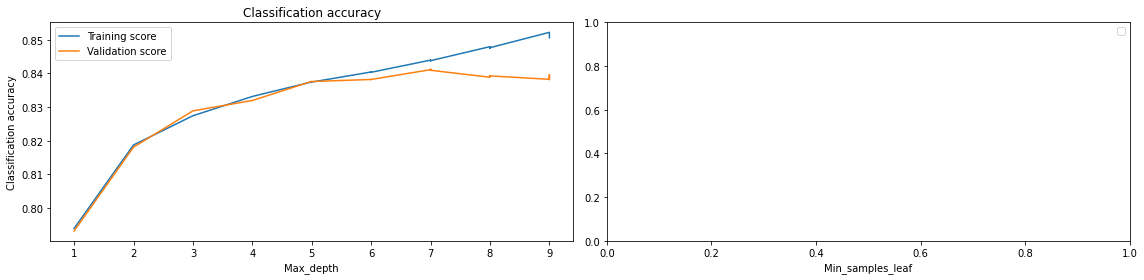

In [ ]:
plt.figure(figsize=(16, 4))
accuracy = plt.subplot(121)
leaf_plot = plt.subplot(122)
# leaf_plot.plot(leaf, plot_train, label="Training score")
# leaf_plot.plot(leaf, plot_val, label="Validation score")
accuracy.plot(degrees, plot_train, label="Training score")
accuracy.plot(degrees, plot_val, label="Validation score")
accuracy.set_title("Classification accuracy")
accuracy.set_xlabel("Max_depth")
accuracy.set_ylabel("Classification accuracy")
# leaf_plot.set_ylabel("Classification accuracy")
accuracy.legend(loc='best')
# leaf_plot.legend(loc='best')
plt.tight_layout()
plt.legend()
plt.show()